<a href="https://colab.research.google.com/github/AnSaradar/laptop-price-prediction/blob/main/Laptop_Price_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Flow Setup

In [ ]:
%%capture
!pip install mlflow
!pip install pyngrok

In [ ]:
import mlflow
import subprocess
from pyngrok import ngrok ,conf
import getpass

In [ ]:
subprocess.Popen(["mlflow","ui","--backend-store-uri",'sqlite:///mlflow.db'])

<Popen: returncode: None args: ['mlflow', 'ui', '--backend-store-uri', 'sqli...>

In [ ]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("Laptop Price Prediction")

2023/06/18 05:34:46 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2023/06/18 05:34:46 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
INFO  [alembic.runtime.migration] Running upgrade 7ac759974ad8 -> 89d4b8295536, create latest metrics table
INFO  [89d4b8295536_create_latest_metrics_table_py] Migration complete!
INFO  

<Experiment: artifact_location='/content/mlruns/1', creation_time=1687066487952, experiment_id='1', last_update_time=1687066487952, lifecycle_stage='active', name='Laptop Price Prediction', tags={}>

In [ ]:
print("Enter ur AUTH from https://dashboard.ngrok.com/auth")
#2Qt0zIDV6eUueAYnaYWjPdRXLpj_6WQqVKexKPYf9UKUCLZ6T
conf.get_default().auth_token = getpass.getpass()
port = 5000
public_url = ngrok.connect(port).public_url
print(f' * ngrok tunnel \ "{public_url}\" -> \"https://127.0.0.1:{port}\"')

Enter ur AUTH from https://dashboard.ngrok.com/auth
··········


WARNI [pyngrok.process.ngrok] t=2023-06-18T05:34:54+0000 lvl=warn msg="ngrok config file found at legacy location, move to XDG location" xdg_path=/root/.config/ngrok/ngrok.yml legacy_path=/root/.ngrok2/ngrok.yml


 * ngrok tunnel \ "https://d392-34-147-86-11.ngrok-free.app" -> "https://127.0.0.1:5000"


# Importing Libraires

## Basic Libs

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error , r2_score , make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
import requests
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score ,KFold
from sklearn.metrics import make_scorer, mean_squared_error
from math import sqrt
from sklearn.svm import SVR
import sklearn.metrics
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import r2_score, mean_absolute_error
import plotly.io as pio

In [ ]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

## Plotly

In [ ]:
!pip install plotly

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.8 MB/s eta 0:00:00


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from catboost import CatBoostRegressor

# Loading the Data

I decided to use two of the most common dataset on this field , So I will load them , discover them and find a way to merge them together

In [ ]:
first_data = pd.read_csv('/content/drive/MyDrive/Datasets/Laptop_Price_Prediction/laptops_train.csv')
second_data = pd.read_csv('/content/drive/MyDrive/Datasets/Laptop_Price_Prediction/train.csv')

# Discover & Merge The Data

In [ ]:
first_data.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [ ]:
second_data.head()

,id,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,884,Dell,Inspiron 3552,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0
1,83,Lenovo,IdeaPad 320-15AST,Notebook,15.6,Full HD 1920x1080,AMD A6-Series 9220 2.5GHz,4GB,128GB SSD,AMD R4 Graphics,Windows 10,2.2kg,399.0
2,897,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.0
3,456,Dell,Alienware 17,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.7GHz,8GB,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42kg,2046.0
4,627,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 620,No OS,2.2kg,468.0


In [ ]:
first_data.shape

(977, 13)

In [ ]:
second_data.shape

(912, 13)

In [ ]:
first_data.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price'],
      dtype='object')

In [ ]:
second_data.columns

Index(['id', 'Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'],
      dtype='object')

First,We Notice that The Prices of the datasets are not at the same cuurrecny,So I will convert the first dataset Prices to Euros

In [ ]:
def from_INR_to_Euros(df):

  df['Price'] = 0.000121 * df['Price']

  return df

In [ ]:
first_data = from_INR_to_Euros(first_data)

In [ ]:
first_data.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,1441.415341
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,967.198312
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,618.660900
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,2730.123653
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,1940.550955


Now I will try to Rename the Columns , to match the two datasets

In [ ]:
first_data.rename(columns={' Storage':'Storage'},inplace=True)
second_data.rename(columns={'Company': 'Manufacturer','Product':'Model Name','TypeName':'Category','Inches':'Screen Size','ScreenResolution':'Screen','Ram':'RAM','Memory':'Storage',
                            'Gpu':'GPU','Cpu':'CPU','OpSys':'Operating System','Price_euros':'Price'}, inplace=True)

In [ ]:
concatenated_df = pd.concat([first_data, second_data])
concatenated_df.shape


(1889, 14)

In [ ]:
concatenated_df.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', 'Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price', 'id'],
      dtype='object')

In [ ]:
total_data = concatenated_df.copy()

In [ ]:
total_data.isnull().sum()

Manufacturer                   0
Model Name                     0
Category                       0
Screen Size                    0
Screen                         0
CPU                            0
RAM                            0
Storage                        0
GPU                            0
Operating System               0
Operating System Version    1048
Weight                         0
Price                          0
id                           977
dtype: int64

# Data Visulization

In [ ]:
data = total_data['Price']

mean_value = np.mean(data)
median_value = np.median(data)

# Create a histogram figure
fig = go.Figure()

# Add the histogram trace
histogram_trace = go.Histogram(x=data, name='Histogram')
fig.add_trace(histogram_trace)



# Add the mean line
fig.add_shape(type='line', x0=mean_value, x1=mean_value, y0=0, y1=0.9 * 200,
              line=dict(color='red', width=2, dash='dash'),
              name='Mean')

# # Add the median line
# fig.add_shape(type='line', x0=median_value, x1=median_value, y0=0, y1=0.9 * 200,
#               line=dict(color='blue', width=2, dash='dash'),
#               name='Median')

# Customize the layout (optional)
fig.update_layout(
    title='The Price Histogram with Mean and Median',
    xaxis=dict(title='Price'),
    yaxis=dict(title='Frequency'),
)
config = {'displayModeBar': False}

# Generate the HTML file
pio.write_html(fig, file='Price_Histogram.html', config=config)

# Show the plot
fig.show()

In [ ]:
data= total_data['Weight'].str.replace("kg", "").astype('float32')


mean_value = np.mean(data)
median_value = np.median(data)

# Create a histogram figure
fig = go.Figure()

# Add the histogram trace
histogram_trace = go.Histogram(x=data, name='Histogram')
fig.add_trace(histogram_trace)



# Add the mean line
fig.add_shape(type='line', x0=mean_value, x1=mean_value, y0=0, y1=0.9 * 300,
              line=dict(color='red', width=2, dash='dash'),
              name='Mean')

# Add the median line
fig.add_shape(type='line', x0=median_value, x1=median_value, y0=0, y1=0.9 * 300,
              line=dict(color='blue', width=2, dash='dash'),
              name='Median')

# Customize the layout (optional)
fig.update_layout(
    title='Weight Histogram with Mean and Median',
    xaxis=dict(title='Weight'),
    yaxis=dict(title='Frequency'),
)


# Show the plot
fig.show()

We Notice that the Price is Right_Skewed , and most of the Laptops are about 1000 - 1200 Euros

In [ ]:
data = total_data['Price']

# Create a box plot figure
fig = go.Figure()

# Add the box trace
fig.add_trace(go.Box(y=data))

# Customize the layout (optional)
fig.update_layout(
    title='Price Box plot',
    yaxis=dict(title='Price'),
)

# Show the plot
fig.show()

<Axes: xlabel='Price'>

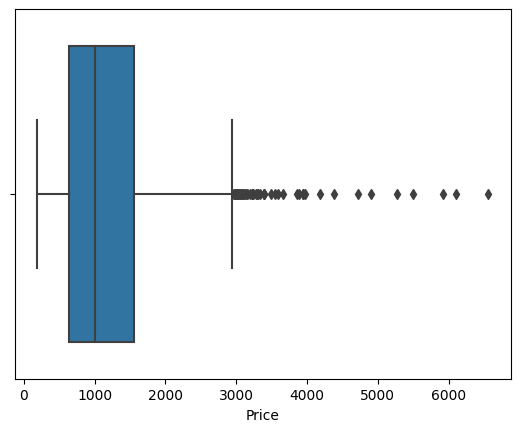

In [ ]:
sns.boxplot(data=total_data,x='Price')

In [ ]:
total_data.Category.value_counts()

Notebook              1046
Gaming                 304
Ultrabook              295
2 in 1 Convertible     166
Workstation             42
Netbook                 36
Name: Category, dtype: int64

In [ ]:
total_data.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', 'Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price', 'id'],
      dtype='object')

In [ ]:
data = total_data['Manufacturer']

counts = data.value_counts()

fig = go.Figure()

fig.add_trace(go.Bar(x=counts.index, y=counts, name='Count Plot', marker_color='skyblue'))

fig.update_layout(
    title='Most Common Brand',
    xaxis=dict(title='Manufacturer'),
    yaxis=dict(title='Count'),
)
config = {'displayModeBar': False}

# Generate the HTML file
pio.write_html(fig, file='most_common_brand.html', config=config)

fig.show()

In [ ]:
os_mapping={
    'Windows 10':'Windows',
    'Windows 7':'Windows',
    'Windows 10 S':'Windows',
    'macOS':'Mac',
    'Mac OS':'Mac',
    'Mac OS X':'Mac',
    'No OS':'Other',
    'Linux':'Other',
    'Chrome OS':'Other',
    'Android ':'Other',
}

In [ ]:
total_data['Operating System'] = total_data['Operating System'].map(os_mapping)

In [ ]:
total_data['Operating System'].value_counts()

Windows    782
Other      233
Mac         35
Name: Operating System, dtype: int64

In [ ]:
data = total_data['Operating System']

counts = data.value_counts()

fig = go.Figure()

fig.add_trace(go.Bar(x=counts.index, y=counts, name='Count Plot', marker_color='skyblue'))

fig.update_layout(
    title='Most Common OS',
    xaxis=dict(title='Operating System'),
    yaxis=dict(title='Count'),
)
config = {'displayModeBar': False}

# Generate the HTML file
pio.write_html(fig, file='most_common_os.html', config=config)

fig.show()

We Should fix this , we should merge all the Mac in one Category , Same thing to Windows

In [ ]:
data = total_data['Category']

counts = data.value_counts()

fig = go.Figure()

fig.add_trace(go.Bar(x=counts.index, y=counts, name='Count Plot', marker_color='skyblue'))

fig.update_layout(
    title='Most Common Laptop Type',
    xaxis=dict(title='Category'),
    yaxis=dict(title='Count'),
)
config = {'displayModeBar': False}

# Generate the HTML file
pio.write_html(fig, file='most_common_type.html', config=config)

fig.show()

In [ ]:
data = total_data['RAM']

counts = data.value_counts()

fig = go.Figure()

fig.add_trace(go.Bar(x=counts.index, y=counts, name='Count Plot', marker_color='skyblue'))

fig.update_layout(
    title='Most Common RAM Size',
    xaxis=dict(title='RAM'),
    yaxis=dict(title='Count'),
)
config = {'displayModeBar': False}

# Generate the HTML file
pio.write_html(fig, file='most_common_ram.html', config=config)

fig.show()

In [ ]:
fig = go.Figure()

# Iterate over each unique laptop type
for laptop_type in total_data['Category'].unique():
    # Filter the dataframe for the current laptop type
    data = total_data[total_data['Category'] == laptop_type]['Price']

    # Add the box trace for the current laptop type
    fig.add_trace(go.Box(y=data, name=laptop_type))

# Customize the layout (optional)
fig.update_layout(
    title='Price Distribution by Laptop Type',
    xaxis=dict(title='Laptop Type'),
    yaxis=dict(title='Price'),
)
config = {'displayModeBar': False}

# Generate the HTML file
pio.write_html(fig, file='price_vs_type.html', config=config)

# Show the plot
fig.show()

In [ ]:
fig = go.Figure()

# Iterate over each unique laptop type
for laptop_type in total_data['Manufacturer'].unique()[:10]:
    # Filter the dataframe for the current laptop type
    data = total_data[total_data['Manufacturer'] == laptop_type]['Price']

    # Add the box trace for the current laptop type
    fig.add_trace(go.Box(y=data, name=laptop_type))

# Customize the layout (optional)
fig.update_layout(
    title='Price Distribution by Manufacturer',
    xaxis=dict(title='Manufacturer'),
    yaxis=dict(title='Price'),
)
config = {'displayModeBar': False}

# Generate the HTML file
pio.write_html(fig, file='price_vs_brand.html', config=config)

# Show the plot
fig.show()

# Train / Test Split

In [ ]:
def shuffle_and_split_data(data, test_ratio):
 shuffled_indices = np.random.permutation(len(data))
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size]
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices]


In [ ]:
train_set, test_set = shuffle_and_split_data(total_data, 0.1)

# Data Preprocessing

## Data Reformating

In [ ]:
def remove_trailing_quote(value):
    # Define a regular expression pattern to match a number followed by a trailing "
    pattern = r'(\d+(\.\d+)?)\"'

    # Check if the value matches the pattern
    match = re.match(pattern, str(value))

    if match:
        # Remove the trailing " and return the matched number
        return match.group(1)
    else:
        # Return the original value if it doesn't match the pattern
        return value



In [ ]:
def data_reformating(df):

  df['Screen Size'] = df['Screen Size'].apply(remove_trailing_quote)
  df['Weight'] = df['Weight'].str.replace("kg", "").astype('float32')
  #df['RAM'] = df['RAM'].str.replace('GB', '').astype(int)
  df['Screen Size'] = df['Screen Size'].astype('float32')
  df["Operating System"] = df["Operating System"].str.replace('macOS','Mac OS')
  df["Operating System"] = df["Operating System"].str.replace('^.*?(Windows|Mac OS)', r'\1', regex=True)

  return df

## Feature Extraxtion

### Screen Column

After studying the Data and doing some research , We Decided to divide the Screen Column into these four Feature:



1. Is_Touchscreen
2. Is_IPS_Panal
3. Screen Type
4. Resolution



In [ ]:
def handling_screen_column(df):

  df['Is_Touchscreen'] = df['Screen'].str.contains('Touchscreen', case=False).astype(int)

  df['Is_IPS_Panal'] = df['Screen'].str.contains('IPS Panel', case=False).astype(int)

  df['ScreenType'] = df['Screen'].str.extract('(Full HD|Quad HD\+|4K Ultra HD|Retina Display)', expand=False)
  df['ScreenType'].fillna('Unknown', inplace=True)

  df['Resolution'] = df['Screen'].str.extract('(\d+x\d+)', expand=False)
  df['Resolution'] = df['Resolution'].astype('category')
  df['Resolution'] = df['Resolution'].cat.add_categories('Unknown')
  df['Resolution'].fillna('Unknown', inplace=True)






  return df

### Storage Column

The Storage Data is Divided into four types, I will rank them from the fastest:

1. Flash Storage
2. SSD
3. Hybrid
4. HDD

In [ ]:
def handling_storage_column(df):
    # Initialize new columns with default values as 0
    df['Hybrid'] = 0
    df['SSD'] = 0
    df['HDD'] = 0
    df['Flash Storage'] = 0

    # Define patterns for each memory type
    patterns = {
        'Hybrid': r'(\d+\.?\d*)(GB|TB) Hybrid',
        'SSD': r'(\d+\.?\d*)(GB|TB) SSD',
        'HDD': r'(\d+\.?\d*)(GB|TB) HDD',
        'Flash Storage': r'(\d+\.?\d*)(GB|TB) Flash Storage'
    }

    # Iterate over each memory value and extract corresponding memory types
    for index, row in df.iterrows():
        memory_value = row['Storage']
        for memory_type, pattern in patterns.items():
            match = re.search(pattern, memory_value)
            if match:
                value = float(match.group(1))
                unit = match.group(2)
                if unit == 'TB':
                    value *= 1024  # Convert TB to GB
                df.at[index, memory_type] = value

    return df

### CPU Column

From The Cpu Column , I will Extract these features :

1. CPU Frequency GHz
2. CPU Series
3. CPU Company
4. CPU Generation

In [ ]:
import requests

def get_intel_cpu_generation(cpu_name):
    base_url = "https://ark.intel.com"
    api_endpoint = "/service/processors/search"

    # Make the API request
    response = requests.get(base_url + api_endpoint, params={"name": cpu_name})

    # Parse the response and extract the CPU generation
    cpu_data = response.json()
    if cpu_data['processors']:
        cpu_generation = cpu_data['processors'][0]['generation']
        return cpu_generation

    return None


In [ ]:
def get_amd_cpu_generation(cpu_name):
    base_url = "https://api.amd.com"
    api_endpoint = "/product/v2/list"

    # Make the API request
    response = requests.get(base_url + api_endpoint, params={"appName": "ryzen", "cpuName": cpu_name})

    # Parse the response and extract the CPU generation
    cpu_data = response.json()
    if cpu_data['Data']:
        cpu_generation = cpu_data['Data'][0]['Generation']
        return cpu_generation

    return None

In [ ]:
def fixing_cpu_column(df):

  df['CPU'] = df['CPU'].str.replace('AMD Ryzen 1700','AMD Ryzen7 1700')
  df['CPU'] = df['CPU'].str.replace('AMD Ryzen 1600','AMD Ryzen7 1600')

  return df

In [ ]:
def handling_cpu_column(df):



  df['CPU'] = df['CPU'].str.strip()




  df['CPU_GHz'] = df['CPU'].str.extract(r'(\d+(?:\.\d+)?)GHz')
  df['CPU_GHz'] = df['CPU_GHz'].str.replace('GHz', '')
  df['CPU_GHz'] = df['CPU_GHz'].astype(float)

  df['CPU'] = df['CPU'].str.replace(r'(\d+(?:\.\d+)?)GHz', '')

  df['CPU_Series'] = df['CPU'].str.extract(r'(Core i\d+|Ryzen\d+|Celeron Quad Core|Pentium Quad Core|A8-Series|Pentium Dual Core|Cortex|Celeron Dual Core|A6-Series|Core M|A4-Series|FX|E-Series|Xeon|A10-Series|A9-Series|A12-Series|Atom)')

  df['CPU'] = df['CPU'].str.replace(r'(Core i\d+|Ryzen\d+|Celeron Quad Core|Pentium Quad Core|A8-Series|Pentium Dual Core|Cortex|Celeron Dual Core|A6-Series|Core M|A4-Series|FX|E-Series|Xeon|A10-Series|A9-Series|A12-Series|Atom)', '')

  df['CPU_Company'] = df['CPU'].apply(lambda x: re.findall(r'(AMD|Intel|Nvidia|Samsung)', x)[0] if re.findall(r'(AMD|Intel|Nvidia|Samsung)', x) else None)

  # # Apply the custom functions to create the CPU_Gen feature
  # df['CPU_Gen'] = df.apply(lambda row: get_intel_cpu_generation(row) if row['CPU_Company'] == 'Intel' else get_amd_cpu_generation(row), axis=1)

  # # Set the value to "NO GEN" for rows where CPU_Company is neither Intel nor AMD
  # df.loc[df['CPU_Company'].isin(['Intel', 'AMD']) == False, 'CPU_Gen'] = 'NO GEN'

  df['CPU'] = df['CPU'].str.replace(r'(AMD|Intel|Nvidia|Samsung)', '')



  return df



### GPU Column

We Divide the GPU Feature into these features:

1. GPU Company
2. GPU Series

In [ ]:
def fixing_gpu_column(df):


  #df['GPU'] = df['GPU'].str.replace('(AMD|Intel|Nvidia)', '', regex=True)

  # Intel
  df['GPU'] = df['GPU'].str.replace('Intel Graphics', 'HD Graphics')
  df['GPU'] = df['GPU'].str.replace('Graphics 620', 'UHD Graphics')

  #AMD
  df['GPU'] = df['GPU'].str.replace('Radeon R5', 'RadeonR5')
  df['GPU'] = df['GPU'].str.replace('R17M-M1-70', 'RadeonR5')
  df['GPU'] = df['GPU'].str.replace('Radeon RX', 'RadeonRX')
  df['GPU'] = df['GPU'].str.replace('Radeon Pro', 'RadeonPro')
  df['GPU'] = df['GPU'].str.replace('Radeon R7', 'RadeonR7')
  df['GPU'] = df['GPU'].str.replace('Radeon R9', 'RadeonR9')
  df['GPU'] = df['GPU'].str.replace('Radeon R3', 'RadeonR3')
  df['GPU'] = df['GPU'].str.replace('Radeon R2', 'RadeonR2')
  df['GPU'] = df['GPU'].str.replace('Radeon R4', 'RadeonR4')
  df['GPU'] = df['GPU'].str.replace('Radeon R4 Graphics', 'RadeonR4')
  df['GPU'] = df['GPU'].str.replace('Radeon R2 Graphics', 'RadeonR2')
  df['GPU'] = df['GPU'].str.replace('R4 Graphics', 'RadeonR4')

  # NVIDIA
  df['GPU'] = df['GPU'].str.replace('GeForce 930MX', 'GeForceMX 930')
  df['GPU'] = df['GPU'].str.replace('GeForce 940MX', 'GeForceMX 940')
  df['GPU'] = df['GPU'].str.replace('GeForce 940M', 'GeForceMX 940')
  df['GPU'] = df['GPU'].str.replace('GeForce 960M', 'GeForceGTX 960')
  df['GPU'] = df['GPU'].str.replace('GTX 980 SLI', 'GeForceGTX 980')
  df['GPU'] = df['GPU'].str.replace('GeForce GTX 940M', 'GeForceMX 940')
  df['GPU'] = df['GPU'].str.replace('GeForce GTX1080', 'GeForceGTX 1080')
  df['GPU'] = df['GPU'].str.replace('GeForce GTX 930MX', 'GeForceMX 930')
  df['GPU'] = df['GPU'].str.replace('GeForce GTX 1070M', 'GeForceGTX 1070')
  df['GPU'] = df['GPU'].str.replace('GeForce GTX1050 Ti', 'GeForceGTX 1050 Ti')
  df['GPU'] = df['GPU'].str.replace('GeForce GTX1060', 'GeForceGTX 1060')

  df['GPU'] = df['GPU'].str.replace('GeForce GT 940MX', 'GeForceMX 940')
  df['GPU'] = df['GPU'].str.replace('GeForce 930M', 'GeForceMX 930')
  df['GPU'] = df['GPU'].str.replace('GeForce MX130', 'GeForceMX 130')
  df['GPU'] = df['GPU'].str.replace('GeForce GTX 950M', 'GeForceMX 950')
  df['GPU'] = df['GPU'].str.replace('GeForce 920MX', 'GeForceMX 920')
  df['GPU'] = df['GPU'].str.replace('GeForce 920M', 'GeForceMX 920')
  df['GPU'] = df['GPU'].str.replace('GeForce 920', 'GeForceMX 920')
  df['GPU'] = df['GPU'].str.replace('GeForce MX150', 'GeForceMX 150')
  df['GPU'] = df['GPU'].str.replace('GeForce 150MX', 'GeForceMX 150')
  df['GPU'] = df['GPU'].str.replace('GeForce GTX ', 'GeForceGTX')

  return df


In [ ]:
def handling_gpu_column(df):

  df['GPU_Company'] = df['GPU'].str.extract('(AMD|Intel|Nvidia)', expand=False)
  df['GPU_Company'].fillna('Intel',inplace=True)

  df['GPU_series'] = df['GPU'].str.extract(r'((?:HD Graphics|Iris Pro Graphics|Iris Graphics|ARM|Iris Plus Graphics|UHD Graphics|RadeonR5|RadeonRX|RadeonPro|RadeonR[0-9]+|GeForceMX|GeForceGTX|Quadro|FirePro|RadeonR[0-9]+|Radeon))', expand=False)
  df['GPU_Company'].fillna('Intel',inplace=True)
  df['GPU'] = df['GPU'].str.replace(r'((?:HD Graphics|Iris Pro Graphics|Iris Graphics|ARM|Iris Plus Graphics|UHD Graphics|RadeonR5|RadeonRX|RadeonPro|RadeonR[0-9]+|GeForceMX|GeForceGTX|Quadro|FirePro|RadeonR[0-9]+|Radeon))', '', regex=True)

  return df

## Preprocessing Function

In [ ]:
def data_preprocessing(df):

  df = remove_trailing_quote(df)
  df = data_reformating(df)
  df = handling_screen_column(df)
  df = handling_storage_column(df)
  df = fixing_cpu_column(df)
  df = handling_cpu_column(df)
  df = fixing_gpu_column(df)
  df = handling_gpu_column(df)



  df.drop(['id','Operating System Version','CPU','GPU','Storage','Screen','Model Name'],axis=1,inplace=True)

  return df

In [ ]:
cleaned_data_train = data_preprocessing(train_set.copy())
cleaned_data_test = data_preprocessing(test_set.copy())

<ipython-input-57-b7978efcadc0>:14: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-57-b7978efcadc0>:18: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-57-b7978efcadc0>:28: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-57-b7978efcadc0>:14: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-57-b7978efcadc0>:18: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-57-b7978efcadc0>:28: FutureWarning:

The default value of regex will change from True to False in a future version.



## Feature Engineering

In [ ]:
def add_ppi_feature(df):

  df['Width'] = df['Resolution'].apply(lambda x: x.split("x")[0]).astype(int)
  df['Height'] = df['Resolution'].apply(lambda y: y.split("x")[-1]).astype(int)

  most_freq_width = df['Width'].mode()[0]
  most_freq_height = df['Height'].mode()[0]
  df['Width'] = df['Width'].fillna(most_freq_width)
  df['Height'] = df['Height'].fillna(most_freq_height)

  df['ppi'] = (((df['Height']**2) + (df['Width']**2))**0.5/df['Screen Size']).astype('float')

  return df

In [ ]:
ppi_feature_method = Pipeline([('ppi', FunctionTransformer(add_ppi_feature, validate=False))])

In [ ]:
cleaned_data_train = ppi_feature_method.transform(cleaned_data_train)
cleaned_data_test =  ppi_feature_method.transform(cleaned_data_test)

In [ ]:
cleaned_data_train.to_csv('cleaned_data_train.csv')

In [ ]:
import pickle

with open('ppi_feature_adder.pkl', 'wb') as f:
    pickle.dump(ppi_feature_method, f)

### Cluster Method

I will Try to use some Clustering method , To create a new Feature called Cluster_Class

In [ ]:

def add_cluster_feature(df):

  X = df.copy()

  X = data_preprocessing(X)


  categorical_columns =  ['Manufacturer', 'Category', 'Operating System', 'ScreenType', 'Resolution', 'CPU_Series', 'CPU_Company', 'GPU_Company', 'GPU_series']
  numerical_columns = ['Screen Size', 'RAM', 'Weight','Hybrid', 'SSD', 'HDD', 'Flash Storage', 'CPU_GHz','Width','Height','ppi']


  processor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat',OneHotEncoder(),categorical_columns)
    ])
  try:

    X = processor.fit_transform(X)
  except Exception as e:
    print("Error occurred during One-Hot Encoding:", e)

  k = 3


  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)


  cluster_labels = kmeans.labels_

  df['Cluster_Team'] = cluster_labels


  return df

In [ ]:
X = cleaned_data_train.drop(['Price'],axis=1).copy()
X_test = cleaned_data_test.drop(['Price'],axis=1).copy()

categorical_columns =  ['Manufacturer', 'Category', 'Operating System', 'ScreenType', 'Resolution', 'CPU_Series', 'CPU_Company', 'GPU_Company', 'GPU_series']
numerical_columns = ['Screen Size',  'Weight','Hybrid', 'SSD', 'HDD', 'Flash Storage', 'CPU_GHz','Width','Height','ppi']
ranked_categorical_columns = ['RAM']

processor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_columns),
        ('cat_rank',OrdinalEncoder(),ranked_categorical_columns)

    ])

X = processor.fit_transform(X)
X_test = processor.transform(X_test)
k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

cluster_labels = kmeans.labels_
test_lables = kmeans.predict(X_test)

cleaned_data_train['Cluster_Team'] = cluster_labels
cleaned_data_test['Cluster_Team'] = test_lables

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
import pickle

with open('cluster_team.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

## Checking Dublicates

In [ ]:
cleaned_data_train.duplicated().sum()

3

In [ ]:
cleaned_data_train.head()

,Manufacturer,Category,Screen Size,RAM,Operating System,Weight,Price,Is_Touchscreen,Is_IPS_Panal,ScreenType,Resolution,Hybrid,SSD,HDD,Flash Storage,CPU_GHz,CPU_Series,CPU_Company,GPU_Company,GPU_series,Width,Height,ppi,Cluster_Team
245,Dell,Notebook,15.6,8GB,NaN,2.20,1059.793020,0,0,Full HD,1920x1080,0,128,500,0,1.8,Core i7,Intel,AMD,Radeon,1920,1080,141.211995,0
173,HP,Notebook,13.3,4GB,Windows,1.49,800.000000,0,0,Unknown,1366x768,0,0,500,0,2.4,Core i3,Intel,Intel,UHD Graphics,1366,768,117.826528,2
364,Lenovo,Notebook,15.6,8GB,Other,2.20,536.890068,0,0,Unknown,1366x768,0,256,1024,0,2.0,Core i3,Intel,Nvidia,GeForceMX,1366,768,100.454667,0
517,Asus,Gaming,15.6,24GB,NaN,2.24,3193.366176,0,0,Full HD,1920x1080,0,256,1024,0,2.8,Core i7,Intel,Nvidia,GeForceGTX,1920,1080,141.211995,1
233,HP,Ultrabook,12.5,8GB,Windows,1.26,1895.000000,0,0,Unknown,1366x768,0,256,0,0,2.4,Core i5,Intel,Intel,HD Graphics,1366,768,125.367428,0


## Data analysis "After Preprocessing"

### Cluster Team Count

In [ ]:
sns.countplot(data = cleaned_data_train , x = 'Cluster_Team')

In [ ]:
sns.boxplot(data=cleaned_data_train,x = 'Cluster_Team',y='Price').set(title='Team vs Price')

In [ ]:
sns.boxplot(data=cleaned_data_train,x = 'ScreenType',y='Price')

In [ ]:
sns.boxplot(data=cleaned_data_train,x = 'GPU_Company',y='Price')

In [ ]:
sns.scatterplot(data = cleaned_data_train , x = 'CPU_GHz' , y = 'Price').set(title='CPU_GHz Vs Price Scatter ')

In [ ]:
sns.histplot(data=cleaned_data_train,x='CPU_GHz').set(title='CPU Frequency per GHz Histogram ')

In [ ]:
sns.scatterplot(data = cleaned_data_train , x = 'Price' , y = 'RAM')

In [ ]:
sns.scatterplot(data = cleaned_data_train , x = 'Price' , y = 'Weight').set(title='Weight Vs Price Scatter ')

In [ ]:
sns.scatterplot(data = cleaned_data_train , x = 'Price' , y = 'Screen Size')

In [ ]:
plt.figure(figsize=(20, 18))
sns.heatmap(cleaned_data_train.corr(),annot = True)
plt.show()

In [ ]:
sns.histplot(data=cleaned_data_train , x='RAM').set(title='RAM Histogram')

In [ ]:
sns.histplot(data=cleaned_data_train , x='Weight').set(title='Weight Histogram')

In [ ]:
sns.histplot(data=cleaned_data_train , x='Screen Size')

In [ ]:
sns.histplot(data=cleaned_data_train , x='Price').set(title='Price Histogram')

In [ ]:
log_price = cleaned_data_train.copy()
log_price['Price'] = np.log(log_price['Price'])

sns.histplot(data=log_price , x='Price').set(title='Price Histogram (After Log Transformation)')

In [ ]:
sns.boxplot(data=cleaned_data_train,x = 'Is_Touchscreen' , y = 'Price').set(title='TouchScreen vs Price')

In [ ]:
sns.boxplot(data=cleaned_data_train,x = 'Is_IPS_Panal' , y = 'Price').set(title='IPS Panel vs Price')

In [ ]:
sns.boxplot(data=cleaned_data_train,x = 'CPU_Company' , y = 'Price').set(title='CPU Companeis vs Price')

In [ ]:
sns.boxplot(data=cleaned_data_train,x = 'GPU_Company' , y = 'Price').set(title='GPU Companies vs Price')

In [ ]:
sns.histplot(data=cleaned_data_train,x='ppi').set(title='PPI Histogram')

In [ ]:
sns.scatterplot(data=cleaned_data_train,x='ppi',y='Price').set(title='PPI vs Price')

# Data Transformation

## Manual Feature Ranking


### GPU

In [ ]:
gpu_series_ranking = {
    'GeForceGTX':16 ,
    'RadeonRX': 15,
    'GeForceMX':14 ,
    'RadeonPro':13 ,
    'RadeonR9':12 ,
    'RadeonR7':11 ,
    'FirePro':10,
    'Quadro': 9,
    'RadeonR5': 8,
    'Radeon':8,
    'Iris Pro Graphics':7 ,
    'Iris Plus Graphics':6 ,
    'RadeonR3':5 ,
    'Iris Graphics':4 ,
    'RadeonR2':3 ,
    'UHD Graphics':2,
    'HD Graphics':1 ,

  }

### CPU

In [ ]:
processor_ranking = {
    'Pentium Quad Core': 4,
    'A6-Series': 10,
    'Core i7': 20,
    'Core i5': 18,
    'Core i3': 17,
    'Celeron Dual Core': 1,
    'Xeon': 15,
    'A9-Series': 12,
    'Atom': 20,
    'FX': 6,
    'A4-Series': 10,
    'Ryzen': 19,
    'E-Series': 5,
    'Core M': 16,
    'A12-Series': 14,
    'Celeron Quad Core': 3,
    'Pentium Dual Core': 2,
    'A10-Series': 13,
    'A8-Series': 11
    }


## Binning / Discreatization

### RAM

In [ ]:
def RAM_Binning(df):

    df['RAM'] = pd.cut(df['RAM'], bins=[0, 8, 8.1, float('inf')], labels=[1, 2, 3], right=False)
    df['RAM'].fillna(1,inplace=True)
    return df

### Weight

In [ ]:
def Weight_Binning(df):

    min_weight = df['Weight'].min()
    max_weight = df['Weight'].max()


    bins = [min_weight, (min_weight + max_weight) / 2, max_weight]
    labels = [3, 1]


    df['Weight'] = pd.cut(df['Weight'], bins=bins, labels=labels, right=False)
    df['Weight'].fillna(1,inplace=True)

    return df

## Features Categories

In [ ]:
categorical_columns = ['Manufacturer', 'RAM','Category', 'Operating System', 'ScreenType', 'Resolution', 'CPU_Series', 'CPU_Company', 'GPU_Company', 'GPU_series','Cluster_Team']
numerical_columns = ['Screen Size',  'Weight','Hybrid', 'SSD', 'HDD', 'Flash Storage', 'CPU_GHz','Height','Width','ppi']
ranked_categorical_columns = ['RAM']

In [ ]:
X = cleaned_data_train.drop(['Price'],axis=1).copy()
y = cleaned_data_train['Price'].copy()

X_test = cleaned_data_test.drop(['Price'],axis=1).copy()
y_test = cleaned_data_test['Price'].copy()

## Pipeline

In [ ]:
processor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat',OneHotEncoder(),categorical_columns),
        ('cat_rank',OrdinalEncoder(),ranked_categorical_columns)
    ])

In [ ]:
preprocessing_pipeline = Pipeline([
    ('cluster_team', FunctionTransformer(add_cluster_feature, validate=False)),
    ('preprocess', FunctionTransformer(data_preprocessing, validate=False)),
    ('transformer', processor),
])

In [ ]:
X_transformed = processor.fit_transform(X)

In [ ]:
with open('processor.pkl', 'wb') as f:
    pickle.dump(processor, f)

In [ ]:
X_transformed.shape

(1701, 123)

## Polynomial Features

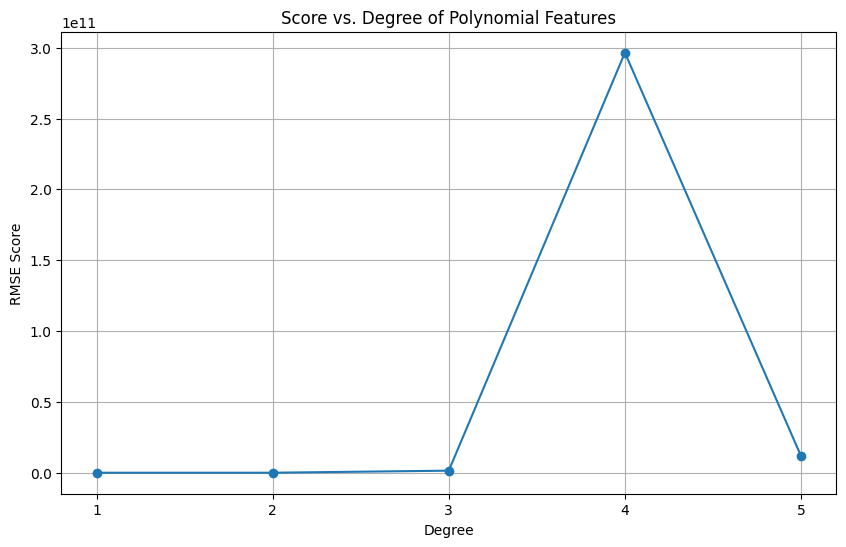

In [ ]:
# Define a range of degrees to consider
degrees = np.arange(1, 6)

# Create lists to store the degrees and corresponding scores
degrees_list = []
scores_list = []
categorical_columns = ['Manufacturer', 'RAM','Category', 'Operating System', 'ScreenType', 'Resolution', 'CPU_Series', 'CPU_Company', 'GPU_Company', 'GPU_series','Cluster_Team']
numerical_columns = ['Screen Size',  'Weight','Hybrid', 'SSD', 'HDD', 'Flash Storage', 'CPU_GHz','Height','Width','ppi']
ranked_categorical_columns = ['RAM']
# Iterate over different degrees
for degree in degrees:
  X = cleaned_data_train.drop(['Price'],axis=1).copy()
  y = cleaned_data_train['Price'].copy()
  processor = ColumnTransformer(transformers=[
        ('poly',PolynomialFeatures(degree=degree),numerical_columns),
        ('num', StandardScaler(), numerical_columns),
        ('cat',OneHotEncoder(handle_unknown = 'ignore'),categorical_columns),
        ('cat_rank',OrdinalEncoder(),ranked_categorical_columns)
    ])
    # Create polynomial features
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
  X_train = processor.fit_transform(X_train)
  X_test = processor.transform(X_test)



  model = LinearRegression()

  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  rmse = mean_squared_error(y_test, y_pred, squared=False)
  degrees_list.append(degree)
  scores_list.append(rmse)



# Plot the scores
plt.figure(figsize=(10, 6))
plt.title('Score vs. Degree of Polynomial Features')
plt.xlabel('Degree')
plt.ylabel('RMSE Score')
plt.grid()
plt.plot(degrees_list, scores_list, 'o-')
plt.xticks(degrees_list)
plt.show()

## Feature Selection

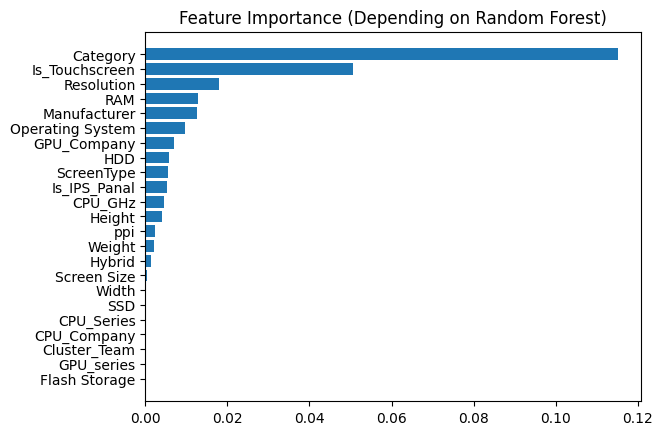

In [ ]:
rf = RandomForestRegressor(random_state=0)
features = X.columns
rf.fit(X_transformed,y)
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.title("Feature Importance (Depending on Random Forest)")
plt.show()


# Model Training & Evaluation & Selection

##Pipeline Steps Evaluation

Sorry The Code need REFACTORING BUT I RAN OUT OF TIME

###  BaseLine Experminet

In [ ]:
new_train = train_set.copy()
new_test = test_set.copy()

new_train.drop(['id','Operating System Version','Model Name'],axis=1,inplace=True)
new_test.drop(['id','Operating System Version','Model Name'],axis=1,inplace=True)

In [ ]:
new_train.columns

Index(['Manufacturer', 'Category', 'Screen Size', 'Screen', 'CPU', 'RAM',
       'Storage', 'GPU', 'Operating System', 'Weight', 'Price'],
      dtype='object')

In [ ]:
categorical_columns =  ['Manufacturer', 'Operating System','RAM','Storage','Screen','Category','CPU','GPU','Weight' ]
ranked_categorical_columns = []
numerical_columns = []

In [ ]:
processor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_columns),
        ('ranked_cat',OrdinalEncoder(handle_unknown='use_encoded_value'),ranked_categorical_columns)
    ])

X = new_train.drop(['Price'],axis=1).copy()
y = new_train['Price'].copy()

X_transformed = processor.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X_transformed, y, test_size=0.33, random_state=42)

X_test = new_test.drop(['Price'],axis=1).copy()
y_test = new_test['Price'].copy()

X_test = processor.transform(X_test)

with mlflow.start_run(run_name = 'Baseline_1'):
  mlflow.set_tag('model_name','LinearReg ')
  mlflow.log_param("preprocessing_steps", "None")
  mlflow.log_param("Parameters", "Deafult")




  model = LinearRegression()

  model.fit(X_train,y_train)
  y_pred = model.predict(X_valid)

  rmse_valid = mean_squared_error(y_valid, y_pred, squared=False)
  r2_valid = r2_score(y_valid, y_pred)
  mae_valid = mean_absolute_error(y_valid, y_pred)

  y_pred = model.predict(X_test)


  rmse_test = mean_squared_error(y_test, y_pred, squared=False)
  r2_test = r2_score(y_test, y_pred)
  mae_test = mean_absolute_error(y_test, y_pred)

  mlflow.log_metric("validation_score_RMSE", rmse_valid)
  mlflow.log_metric("validation_score_R2", r2_valid)
  mlflow.log_metric("validation_score_MAE", mae_valid)

  mlflow.log_metric("test_score_RMSE", rmse_test)
  mlflow.log_metric("test_score_R2", r2_test)
  mlflow.log_metric("test_score_MAE", mae_test)
  mlflow.end_run()






In [ ]:
with mlflow.start_run(run_name = 'Baseline_2'):
  mlflow.set_tag('model_name','XGB')
  mlflow.log_param("preprocessing_steps", "None")
  mlflow.log_param("Parameters", "Deafult")




  model = xgb.XGBRegressor()

  model.fit(X_train,y_train)
  y_pred = model.predict(X_valid)

  rmse_valid = mean_squared_error(y_valid, y_pred, squared=False)
  r2_valid = r2_score(y_valid, y_pred)
  mae_valid = mean_absolute_error(y_valid, y_pred)

  y_pred = model.predict(X_test)

  rmse_test = mean_squared_error(y_test, y_pred, squared=False)
  r2_test = r2_score(y_test, y_pred)
  mae_test = mean_absolute_error(y_test, y_pred)

  mlflow.log_metric("validation_score_RMSE", rmse_valid)
  mlflow.log_metric("validation_score_R2", r2_valid)
  mlflow.log_metric("validation_score_MAE", mae_valid)

  mlflow.log_metric("test_score_RMSE", rmse_test)
  mlflow.log_metric("test_score_R2", r2_test)
  mlflow.log_metric("test_score_MAE", mae_test)
  mlflow.end_run()


### Preprocessing_1 : Reformating

In [ ]:
categorical_columns = ['Manufacturer', 'Category', 'Operating System', 'Screen', 'GPU','CPU','Storage']
numerical_columns = ['Screen Size', 'RAM', 'Weight']

processor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_columns)
    ])



In [ ]:
without_feature_ex = train_set.drop(['id','Operating System Version','Model Name'],axis=1)
without_feature_ex = remove_trailing_quote(without_feature_ex)
without_feature_ex = data_reformating(without_feature_ex)

In [ ]:
X = without_feature_ex.drop(['Price'],axis=1).copy()
y = without_feature_ex['Price'].copy()

X_without_transformed = processor.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X_without_transformed, y, test_size=0.33, random_state=42)

without_feature_ex_test = test_set.drop(['id','Operating System Version','Model Name'],axis=1)
without_feature_ex_test = remove_trailing_quote(without_feature_ex_test)
without_feature_ex_test = data_reformating(without_feature_ex_test)

X_test = without_feature_ex_test.drop(['Price'],axis=1).copy()
y_test = without_feature_ex_test['Price'].copy()
X_transformed_test = processor.transform(X_test)

with mlflow.start_run(run_name = 'Preprocesser_1:Reformatting(BaseLine)'):
  mlflow.set_tag('model_name','LinearReg Baseline')
  mlflow.log_param("preprocessing_steps", "Feature Reformating")
  mlflow.log_param("Parameters", "Deafult")




  model = LinearRegression()

  model.fit(X_train,y_train)
  y_pred = model.predict(X_valid)

  rmse_valid = mean_squared_error(y_valid, y_pred, squared=False)
  r2_valid = r2_score(y_valid, y_pred)
  mae_valid = mean_absolute_error(y_valid, y_pred)


  y_pred = model.predict(X_transformed_test)
  rmse_test = mean_squared_error(y_test, y_pred, squared=False)
  r2_test = r2_score(y_test, y_pred)
  mae_test = mean_absolute_error(y_test, y_pred)


  mlflow.log_metric("validation_score_RMSE", rmse_valid)
  mlflow.log_metric("validation_score_R2", r2_valid)
  mlflow.log_metric("validation_score_MAE", mae_valid)

  mlflow.log_metric("test_score_RMSE", rmse_test)
  mlflow.log_metric("test_score_R2", r2_test)
  mlflow.log_metric("test_score_MAE", mae_test)

  mlflow.end_run()

In [ ]:
with mlflow.start_run(run_name = 'Preprocesser_1:Reformatting(Bestmodel)'):
  mlflow.set_tag('model_name','xgb_model')
  mlflow.log_param("preprocessing_steps", "Feature Reformating")
  mlflow.log_param("Parameters", "Deafult")




  model = xgb.XGBRegressor()

  model.fit(X_train,y_train)
  y_pred = model.predict(X_valid)

  rmse_valid = mean_squared_error(y_valid, y_pred, squared=False)
  r2_valid = r2_score(y_valid, y_pred)
  mae_valid = mean_absolute_error(y_valid, y_pred)


  y_pred = model.predict(X_transformed_test)
  rmse_test = mean_squared_error(y_test, y_pred, squared=False)
  r2_test = r2_score(y_test, y_pred)
  mae_test = mean_absolute_error(y_test, y_pred)


  mlflow.log_metric("validation_score_RMSE", rmse_valid)
  mlflow.log_metric("validation_score_R2", r2_valid)
  mlflow.log_metric("validation_score_MAE", mae_valid)

  mlflow.log_metric("test_score_RMSE", rmse_test)
  mlflow.log_metric("test_score_R2", r2_test)
  mlflow.log_metric("test_score_MAE", mae_test)
  mlflow.end_run()

### Preprocessing_2: Reformating + Feature Extraxtion

In [ ]:
categorical_columns =  ['Manufacturer', 'Category', 'Operating System', 'ScreenType', 'Resolution', 'CPU_Series', 'CPU_Company', 'GPU_Company', 'GPU_series']
numerical_columns = ['Screen Size', 'RAM', 'Weight','Hybrid', 'SSD', 'HDD', 'Flash Storage', 'CPU_GHz']

processor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_columns)
    ])

new_data = data_preprocessing(train_set.copy())

X = new_data.drop(['Price'],axis=1).copy()
y = new_data['Price'].copy()

X_new_data_transformed = processor.fit_transform(X)
X_train, X_valid, y_train, y_valid = train_test_split(X_new_data_transformed, y, test_size=0.33, random_state=42)

new_data_test = data_preprocessing(test_set.copy())

X_test = new_data_test.drop(['Price'],axis=1).copy()
y_test = new_data_test['Price'].copy()
X_transformed_test = processor.transform(X_test)

with mlflow.start_run(run_name = 'Preprocess_2:Reformating+FeatureExtraction(Baseline)'):
  mlflow.set_tag('model_name','LinearReg Baseline')
  mlflow.log_param("preprocessing_steps", "Feature Reformating + FeatureExtraction")
  mlflow.log_param("Parameters", "Deafult")




  model = LinearRegression()

  model.fit(X_train,y_train)
  y_pred = model.predict(X_valid)

  rmse_valid = mean_squared_error(y_valid, y_pred, squared=False)
  r2_valid = r2_score(y_valid, y_pred)
  mae_valid = mean_absolute_error(y_valid, y_pred)


  y_pred = model.predict(X_transformed_test)
  rmse_test = mean_squared_error(y_test, y_pred, squared=False)
  r2_test = r2_score(y_test, y_pred)
  mae_test = mean_absolute_error(y_test, y_pred)


  mlflow.log_metric("validation_score_RMSE", rmse_valid)
  mlflow.log_metric("validation_score_R2", r2_valid)
  mlflow.log_metric("validation_score_MAE", mae_valid)

  mlflow.log_metric("test_score_RMSE", rmse_test)
  mlflow.log_metric("test_score_R2", r2_test)
  mlflow.log_metric("test_score_MAE", mae_test)
  mlflow.end_run()


<ipython-input-29-b7978efcadc0>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CPU'] = df['CPU'].str.replace(r'(\d+(?:\.\d+)?)GHz', '')
<ipython-input-29-b7978efcadc0>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CPU'] = df['CPU'].str.replace(r'(Core i\d+|Ryzen\d+|Celeron Quad Core|Pentium Quad Core|A8-Series|Pentium Dual Core|Cortex|Celeron Dual Core|A6-Series|Core M|A4-Series|FX|E-Series|Xeon|A10-Series|A9-Series|A12-Series|Atom)', '')
<ipython-input-29-b7978efcadc0>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CPU'] = df['CPU'].str.replace(r'(AMD|Intel|Nvidia|Samsung)', '')
<ipython-input-29-b7978efcadc0>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CPU'] = df['CPU'].str.replace(r'(\d+(?:\.\d+)?)GHz', '')
<ipython-input-29-b7978efcadc0>:18: FutureWarnin

In [ ]:
with mlflow.start_run(run_name = 'Preprocess_2:Reformating+FeatureExtraction(BestModel)'):
  mlflow.set_tag('model_name','xgb_model')
  mlflow.log_param("preprocessing_steps", "Feature Reformating + FeatureExtraction")
  mlflow.log_param("Parameters", "Deafult")
  xgb_model = xgb.XGBRegressor()
  xgb_model.fit(X_train,y_train)
  y_pred = xgb_model.predict(X_valid)
  rmse_valid = mean_squared_error(y_valid, y_pred, squared=False)
  r2_valid = r2_score(y_valid, y_pred)
  mae_valid = mean_absolute_error(y_valid, y_pred)


  y_pred = model.predict(X_transformed_test)
  rmse_test = mean_squared_error(y_test, y_pred, squared=False)
  r2_test = r2_score(y_test, y_pred)
  mae_test = mean_absolute_error(y_test, y_pred)


  mlflow.log_metric("validation_score_RMSE", rmse_valid)
  mlflow.log_metric("validation_score_R2", r2_valid)
  mlflow.log_metric("validation_score_MAE", mae_valid)

  mlflow.log_metric("test_score_RMSE", rmse_test)
  mlflow.log_metric("test_score_R2", r2_test)
  mlflow.log_metric("test_score_MAE", mae_test)
  mlflow.end_run()


### Preprocessing_3: Reformatting + Feature Extraction + Manual Feature Hashing

In [ ]:
categorical_columns =  ['Manufacturer', 'Category', 'Operating System', 'ScreenType', 'Resolution', 'CPU_Company', 'GPU_Company']
numerical_columns = ['Screen Size', 'RAM', 'Weight','Hybrid', 'SSD', 'HDD', 'Flash Storage', 'CPU_GHz']
ranked_categorical_columns = ['CPU_Series','GPU_series']

processor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_columns),
        ('ranked_cat',OrdinalEncoder(handle_unknown='error'),ranked_categorical_columns)
    ])

gpu_series_ranking = {
    'GeForceGTX':16 ,
    'RadeonRX': 15,
    'GeForceMX':14 ,
    'RadeonPro':13 ,
    'RadeonR9':12 ,
    'RadeonR7':11 ,
    'FirePro':10,
    'Quadro': 9,
    'RadeonR5': 8,
    'Radeon':8,
    'Iris Pro Graphics':7 ,
    'Iris Plus Graphics':6 ,
    'RadeonR3':5 ,
    'Iris Graphics':4 ,
    'RadeonR2':3 ,
    'UHD Graphics':2,
    'HD Graphics':1 ,

  }
processor_ranking = {
    'Pentium Quad Core': 4,
    'A6-Series': 10,
    'Core i7': 20,
    'Core i5': 18,
    'Core i3': 17,
    'Celeron Dual Core': 1,
    'Xeon': 15,
    'A9-Series': 12,
    'Atom': 20,
    'FX': 6,
    'A4-Series': 10,
    'Ryzen': 19,
    'E-Series': 5,
    'Core M': 16,
    'A12-Series': 14,
    'Celeron Quad Core': 3,
    'Pentium Dual Core': 2,
    'A10-Series': 13,
    'A8-Series': 11
    }

new_data = data_preprocessing(train_set.copy())
new_data['GPU_series'] = new_data['GPU_series'].map(gpu_series_ranking)
new_data['GPU_series'].fillna(8,inplace=True)
new_data['CPU_Series'] = new_data['CPU_Series'].map(processor_ranking)
new_data['CPU_Series'].fillna(8,inplace=True)


X = new_data.drop(['Price'],axis=1).copy()
y = new_data['Price'].copy()

X_new_data_transformed = processor.fit_transform(X)
X_train, X_valid, y_train, y_valid = train_test_split(X_new_data_transformed, y, test_size=0.33, random_state=42)

new_data_test = data_preprocessing(test_set.copy())
new_data_test['GPU_series'] = new_data_test['GPU_series'].map(gpu_series_ranking)
new_data_test['GPU_series'].fillna(8,inplace=True)
new_data_test['CPU_Series'] = new_data_test['CPU_Series'].map(processor_ranking)
new_data_test['CPU_Series'].fillna(8,inplace=True)

X_test = new_data_test.drop(['Price'],axis=1).copy()
y_test = new_data_test['Price'].copy()
X_transformed_test = processor.transform(X_test)

with mlflow.start_run(run_name = 'Preprocess_3:Reformating+FeatureExtraction+ManualHashing(Baseline)'):
  mlflow.set_tag('model_name','LinearReg Baseline')
  mlflow.log_param("preprocessing_steps", "Feature Reformating - FeatureExtraction - ManualHashing")
  mlflow.log_param("Parameters", "Deafult")




  model = LinearRegression()

  model.fit(X_train,y_train)
  y_pred = model.predict(X_valid)

  rmse_valid = mean_squared_error(y_valid, y_pred, squared=False)
  r2_valid = r2_score(y_valid, y_pred)
  mae_valid = mean_absolute_error(y_valid, y_pred)


  y_pred = model.predict(X_transformed_test)
  rmse_test = mean_squared_error(y_test, y_pred, squared=False)
  r2_test = r2_score(y_test, y_pred)
  mae_test = mean_absolute_error(y_test, y_pred)


  mlflow.log_metric("validation_score_RMSE", rmse_valid)
  mlflow.log_metric("validation_score_R2", r2_valid)
  mlflow.log_metric("validation_score_MAE", mae_valid)

  mlflow.log_metric("test_score_RMSE", rmse_test)
  mlflow.log_metric("test_score_R2", r2_test)
  mlflow.log_metric("test_score_MAE", mae_test)
  mlflow.end_run()

<ipython-input-29-b7978efcadc0>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CPU'] = df['CPU'].str.replace(r'(\d+(?:\.\d+)?)GHz', '')
<ipython-input-29-b7978efcadc0>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CPU'] = df['CPU'].str.replace(r'(Core i\d+|Ryzen\d+|Celeron Quad Core|Pentium Quad Core|A8-Series|Pentium Dual Core|Cortex|Celeron Dual Core|A6-Series|Core M|A4-Series|FX|E-Series|Xeon|A10-Series|A9-Series|A12-Series|Atom)', '')
<ipython-input-29-b7978efcadc0>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CPU'] = df['CPU'].str.replace(r'(AMD|Intel|Nvidia|Samsung)', '')
<ipython-input-29-b7978efcadc0>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CPU'] = df['CPU'].str.replace(r'(\d+(?:\.\d+)?)GHz', '')
<ipython-input-29-b7978efcadc0>:18: FutureWarnin

In [ ]:
with mlflow.start_run(run_name = 'Preprocess_3:Reformating+FeatureExtraction+ManaulHashing(BestModel)'):
  mlflow.set_tag('model_name','xgb_model')
  mlflow.log_param("preprocessing_steps", "Feature Reformating + FeatureExtraction + Manual Hashing")
  mlflow.log_param("Parameters", "Deafult")
  xgb_model = xgb.XGBRegressor()
  xgb_model.fit(X_train,y_train)
  y_pred = xgb_model.predict(X_valid)
  rmse_valid = mean_squared_error(y_valid, y_pred, squared=False)
  r2_valid = r2_score(y_valid, y_pred)
  mae_valid = mean_absolute_error(y_valid, y_pred)


  y_pred = model.predict(X_transformed_test)
  rmse_test = mean_squared_error(y_test, y_pred, squared=False)
  r2_test = r2_score(y_test, y_pred)
  mae_test = mean_absolute_error(y_test, y_pred)


  mlflow.log_metric("validation_score_RMSE", rmse_valid)
  mlflow.log_metric("validation_score_R2", r2_valid)
  mlflow.log_metric("validation_score_MAE", mae_valid)

  mlflow.log_metric("test_score_RMSE", rmse_test)
  mlflow.log_metric("test_score_R2", r2_test)
  mlflow.log_metric("test_score_MAE", mae_test)
  mlflow.end_run()

### Preprocessing_4: Reformatting +Feature Extraction + Manual Hashing+Feature Engineering

In [ ]:
categorical_columns =  ['Manufacturer', 'Category', 'Operating System', 'ScreenType', 'Resolution', 'CPU_Company', 'GPU_Company']
numerical_columns = ['Screen Size', 'RAM', 'Weight','Hybrid', 'SSD', 'HDD', 'Flash Storage', 'CPU_GHz','ppi']
ranked_categorical_columns = ['CPU_Series','GPU_series']

processor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_columns),
        ('ranked_cat',OrdinalEncoder(handle_unknown='error'),ranked_categorical_columns)
    ])

gpu_series_ranking = {
    'GeForceGTX':16 ,
    'RadeonRX': 15,
    'GeForceMX':14 ,
    'RadeonPro':13 ,
    'RadeonR9':12 ,
    'RadeonR7':11 ,
    'FirePro':10,
    'Quadro': 9,
    'RadeonR5': 8,
    'Radeon':8,
    'Iris Pro Graphics':7 ,
    'Iris Plus Graphics':6 ,
    'RadeonR3':5 ,
    'Iris Graphics':4 ,
    'RadeonR2':3 ,
    'UHD Graphics':2,
    'HD Graphics':1 ,

  }
processor_ranking = {
    'Pentium Quad Core': 4,
    'A6-Series': 10,
    'Core i7': 20,
    'Core i5': 18,
    'Core i3': 17,
    'Celeron Dual Core': 1,
    'Xeon': 15,
    'A9-Series': 12,
    'Atom': 20,
    'FX': 6,
    'A4-Series': 10,
    'Ryzen': 19,
    'E-Series': 5,
    'Core M': 16,
    'A12-Series': 14,
    'Celeron Quad Core': 3,
    'Pentium Dual Core': 2,
    'A10-Series': 13,
    'A8-Series': 11
    }

new_data = data_preprocessing(train_set.copy())
new_data['GPU_series'] = new_data['GPU_series'].map(gpu_series_ranking)
new_data['GPU_series'].fillna(8,inplace=True)
new_data['CPU_Series'] = new_data['CPU_Series'].map(processor_ranking)
new_data['CPU_Series'].fillna(8,inplace=True)
new_data = ppi_feature_method.transform(new_data)

X = new_data.drop(['Price'],axis=1).copy()
y = new_data['Price'].copy()

X_new_data_transformed = processor.fit_transform(X)
X_train, X_valid, y_train, y_valid = train_test_split(X_new_data_transformed, y, test_size=0.33, random_state=42)

new_data_test = data_preprocessing(test_set.copy())
new_data_test['GPU_series'] = new_data_test['GPU_series'].map(gpu_series_ranking)
new_data_test['GPU_series'].fillna(8,inplace=True)
new_data_test['CPU_Series'] = new_data_test['CPU_Series'].map(processor_ranking)
new_data_test['CPU_Series'].fillna(8,inplace=True)
new_data_test = ppi_feature_method.transform(new_data_test)
X_test = new_data_test.drop(['Price'],axis=1).copy()
y_test = new_data_test['Price'].copy()
X_transformed_test = processor.transform(X_test)

with mlflow.start_run(run_name = 'Preprocess_4:Reformating+FeatureExtraction+ManualHashing+Feature Engineering(Baseline)'):
  mlflow.set_tag('model_name','LinearReg Baseline')
  mlflow.log_param("preprocessing_steps", "Feature Reformating - FeatureExtraction - ManualHashing +Feature Engineering ")
  mlflow.log_param("Parameters", "Deafult")




  model = LinearRegression()

  model.fit(X_train,y_train)
  y_pred = model.predict(X_valid)

  rmse_valid = mean_squared_error(y_valid, y_pred, squared=False)
  r2_valid = r2_score(y_valid, y_pred)
  mae_valid = mean_absolute_error(y_valid, y_pred)


  y_pred = model.predict(X_transformed_test)
  rmse_test = mean_squared_error(y_test, y_pred, squared=False)
  r2_test = r2_score(y_test, y_pred)
  mae_test = mean_absolute_error(y_test, y_pred)


  mlflow.log_metric("validation_score_RMSE", rmse_valid)
  mlflow.log_metric("validation_score_R2", r2_valid)
  mlflow.log_metric("validation_score_MAE", mae_valid)

  mlflow.log_metric("test_score_RMSE", rmse_test)
  mlflow.log_metric("test_score_R2", r2_test)
  mlflow.log_metric("test_score_MAE", mae_test)
  mlflow.end_run()

<ipython-input-29-b7978efcadc0>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CPU'] = df['CPU'].str.replace(r'(\d+(?:\.\d+)?)GHz', '')
<ipython-input-29-b7978efcadc0>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CPU'] = df['CPU'].str.replace(r'(Core i\d+|Ryzen\d+|Celeron Quad Core|Pentium Quad Core|A8-Series|Pentium Dual Core|Cortex|Celeron Dual Core|A6-Series|Core M|A4-Series|FX|E-Series|Xeon|A10-Series|A9-Series|A12-Series|Atom)', '')
<ipython-input-29-b7978efcadc0>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CPU'] = df['CPU'].str.replace(r'(AMD|Intel|Nvidia|Samsung)', '')
<ipython-input-29-b7978efcadc0>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CPU'] = df['CPU'].str.replace(r'(\d+(?:\.\d+)?)GHz', '')
<ipython-input-29-b7978efcadc0>:18: FutureWarnin

In [ ]:
with mlflow.start_run(run_name = 'Preprocess_3:Reformating+FeatureExtraction+ManaulHashing+Feature Engineering(BestModel)'):
  mlflow.set_tag('model_name','xgb_model')
  mlflow.log_param("preprocessing_steps", "Feature Reformating + FeatureExtraction + Manual Hashing+Feature Engineering")
  mlflow.log_param("Parameters", "Deafult")
  xgb_model = xgb.XGBRegressor()
  xgb_model.fit(X_train,y_train)
  y_pred = xgb_model.predict(X_valid)
  rmse_valid = mean_squared_error(y_valid, y_pred, squared=False)
  r2_valid = r2_score(y_valid, y_pred)
  mae_valid = mean_absolute_error(y_valid, y_pred)


  y_pred = model.predict(X_transformed_test)
  rmse_test = mean_squared_error(y_test, y_pred, squared=False)
  r2_test = r2_score(y_test, y_pred)
  mae_test = mean_absolute_error(y_test, y_pred)


  mlflow.log_metric("validation_score_RMSE", rmse_valid)
  mlflow.log_metric("validation_score_R2", r2_valid)
  mlflow.log_metric("validation_score_MAE", mae_valid)

  mlflow.log_metric("test_score_RMSE", rmse_test)
  mlflow.log_metric("test_score_R2", r2_test)
  mlflow.log_metric("test_score_MAE", mae_test)
  mlflow.end_run()

### Preprocessing_5: Reformatting +Feature Extraction + Manual Hashing+Feature Engineering(2)"Clustering"

In [ ]:
categorical_columns =  ['Manufacturer', 'Category', 'Operating System', 'ScreenType', 'Resolution', 'CPU_Company', 'GPU_Company']
numerical_columns = ['Screen Size', 'RAM', 'Weight','Hybrid', 'SSD', 'HDD', 'Flash Storage', 'CPU_GHz','ppi']
ranked_categorical_columns = ['CPU_Series','GPU_series']

processor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_columns),
        ('ranked_cat',OrdinalEncoder(handle_unknown='error'),ranked_categorical_columns)
    ])


gpu_series_ranking = {
    'GeForceGTX':16 ,
    'RadeonRX': 15,
    'GeForceMX':14 ,
    'RadeonPro':13 ,
    'RadeonR9':12 ,
    'RadeonR7':11 ,
    'FirePro':10,
    'Quadro': 9,
    'RadeonR5': 8,
    'Radeon':8,
    'Iris Pro Graphics':7 ,
    'Iris Plus Graphics':6 ,
    'RadeonR3':5 ,
    'Iris Graphics':4 ,
    'RadeonR2':3 ,
    'UHD Graphics':2,
    'HD Graphics':1 ,

  }
processor_ranking = {
    'Pentium Quad Core': 4,
    'A6-Series': 10,
    'Core i7': 20,
    'Core i5': 18,
    'Core i3': 17,
    'Celeron Dual Core': 1,
    'Xeon': 15,
    'A9-Series': 12,
    'Atom': 20,
    'FX': 6,
    'A4-Series': 10,
    'Ryzen': 19,
    'E-Series': 5,
    'Core M': 16,
    'A12-Series': 14,
    'Celeron Quad Core': 3,
    'Pentium Dual Core': 2,
    'A10-Series': 13,
    'A8-Series': 11
    }

new_data = data_preprocessing(train_set.copy())
new_data['GPU_series'] = new_data['GPU_series'].map(gpu_series_ranking)
new_data['GPU_series'].fillna(8,inplace=True)
new_data['CPU_Series'] = new_data['CPU_Series'].map(processor_ranking)
new_data['CPU_Series'].fillna(8,inplace=True)
new_data = ppi_feature_method.transform(new_data)

X = new_data.drop(['Price'],axis=1).copy()
y = new_data['Price'].copy()

X_new_data_transformed = processor.fit_transform(X)

new_data_test = data_preprocessing(test_set.copy())
new_data_test['GPU_series'] = new_data_test['GPU_series'].map(gpu_series_ranking)
new_data_test['GPU_series'].fillna(8,inplace=True)
new_data_test['CPU_Series'] = new_data_test['CPU_Series'].map(processor_ranking)
new_data_test['CPU_Series'].fillna(8,inplace=True)
new_data_test = ppi_feature_method.transform(new_data_test)
X_test = new_data_test.drop(['Price'],axis=1).copy()
y_test = new_data_test['Price'].copy()
X_transformed_test = processor.transform(X_test)



<ipython-input-29-b7978efcadc0>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CPU'] = df['CPU'].str.replace(r'(\d+(?:\.\d+)?)GHz', '')
<ipython-input-29-b7978efcadc0>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CPU'] = df['CPU'].str.replace(r'(Core i\d+|Ryzen\d+|Celeron Quad Core|Pentium Quad Core|A8-Series|Pentium Dual Core|Cortex|Celeron Dual Core|A6-Series|Core M|A4-Series|FX|E-Series|Xeon|A10-Series|A9-Series|A12-Series|Atom)', '')
<ipython-input-29-b7978efcadc0>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CPU'] = df['CPU'].str.replace(r'(AMD|Intel|Nvidia|Samsung)', '')
<ipython-input-29-b7978efcadc0>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CPU'] = df['CPU'].str.replace(r'(\d+(?:\.\d+)?)GHz', '')
<ipython-input-29-b7978efcadc0>:18: FutureWarnin

In [ ]:
k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_new_data_transformed)

cluster_labels = kmeans.labels_

X['Cluster_Team'] = cluster_labels

labels = kmeans.predict(X_transformed_test)

X_test['Cluster_Team'] =  labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
categorical_columns =  ['Manufacturer', 'Category', 'Operating System', 'ScreenType', 'Resolution', 'CPU_Company', 'GPU_Company','Cluster_Team']
numerical_columns = ['Screen Size', 'RAM', 'Weight','Hybrid', 'SSD', 'HDD', 'Flash Storage', 'CPU_GHz','ppi']
ranked_categorical_columns = ['CPU_Series','GPU_series']

processor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_columns),
        ('ranked_cat',OrdinalEncoder(handle_unknown='error'),ranked_categorical_columns)
    ])



X_new_data_transformed = processor.fit_transform(X)
X_train, X_valid, y_train, y_valid = train_test_split(X_new_data_transformed, y, test_size=0.33, random_state=42)

X_transformed_test = processor.transform(X_test)

with mlflow.start_run(run_name = 'Preprocess_5:Reformating+FeatureExtraction+ManualHashing+Feature Engineering+Clustering(Baseline)'):
  mlflow.set_tag('model_name','LinearReg Baseline')
  mlflow.log_param("preprocessing_steps", "Feature Reformating - FeatureExtraction - ManualHashing +Feature Engineering+Clustering ")
  mlflow.log_param("Parameters", "Deafult")




  model = LinearRegression()

  model.fit(X_train,y_train)
  y_pred = model.predict(X_valid)

  rmse_valid = mean_squared_error(y_valid, y_pred, squared=False)
  r2_valid = r2_score(y_valid, y_pred)
  mae_valid = mean_absolute_error(y_valid, y_pred)


  y_pred = model.predict(X_transformed_test)
  rmse_test = mean_squared_error(y_test, y_pred, squared=False)
  r2_test = r2_score(y_test, y_pred)
  mae_test = mean_absolute_error(y_test, y_pred)


  mlflow.log_metric("validation_score_RMSE", rmse_valid)
  mlflow.log_metric("validation_score_R2", r2_valid)
  mlflow.log_metric("validation_score_MAE", mae_valid)

  mlflow.log_metric("test_score_RMSE", rmse_test)
  mlflow.log_metric("test_score_R2", r2_test)
  mlflow.log_metric("test_score_MAE", mae_test)
  mlflow.end_run()

In [ ]:
with mlflow.start_run(run_name = 'Preprocess_5:Reformating+FeatureExtraction+ManaulHashing+Feature Engineering+Clustering(BestModel)'):
  mlflow.set_tag('model_name','xgb_model')
  mlflow.log_param("preprocessing_steps", "Feature Reformating + FeatureExtraction + Manual Hashing+Feature Engineering+Clustering")
  mlflow.log_param("Parameters", "Deafult")
  xgb_model = xgb.XGBRegressor()
  xgb_model.fit(X_train,y_train)
  y_pred = xgb_model.predict(X_valid)
  rmse_valid = mean_squared_error(y_valid, y_pred, squared=False)
  r2_valid = r2_score(y_valid, y_pred)
  mae_valid = mean_absolute_error(y_valid, y_pred)


  y_pred = model.predict(X_transformed_test)
  rmse_test = mean_squared_error(y_test, y_pred, squared=False)
  r2_test = r2_score(y_test, y_pred)
  mae_test = mean_absolute_error(y_test, y_pred)


  mlflow.log_metric("validation_score_RMSE", rmse_valid)
  mlflow.log_metric("validation_score_R2", r2_valid)
  mlflow.log_metric("validation_score_MAE", mae_valid)

  mlflow.log_metric("test_score_RMSE", rmse_test)
  mlflow.log_metric("test_score_R2", r2_test)
  mlflow.log_metric("test_score_MAE", mae_test)
  mlflow.end_run()

### Preprocessing_6: Adding Binning

In [ ]:
categorical_columns =  ['Manufacturer', 'Category', 'Operating System', 'ScreenType', 'Resolution', 'CPU_Company', 'GPU_Company']
numerical_columns = ['Screen Size', 'Hybrid', 'SSD', 'HDD', 'Flash Storage', 'CPU_GHz','ppi']
ranked_categorical_columns = ['CPU_Series','GPU_series','RAM', 'Weight']

processor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_columns),
        ('ranked_cat',OrdinalEncoder(handle_unknown='error'),ranked_categorical_columns)
    ])


gpu_series_ranking = {
    'GeForceGTX':16 ,
    'RadeonRX': 15,
    'GeForceMX':14 ,
    'RadeonPro':13 ,
    'RadeonR9':12 ,
    'RadeonR7':11 ,
    'FirePro':10,
    'Quadro': 9,
    'RadeonR5': 8,
    'Radeon':8,
    'Iris Pro Graphics':7 ,
    'Iris Plus Graphics':6 ,
    'RadeonR3':5 ,
    'Iris Graphics':4 ,
    'RadeonR2':3 ,
    'UHD Graphics':2,
    'HD Graphics':1 ,

  }
processor_ranking = {
    'Pentium Quad Core': 4,
    'A6-Series': 10,
    'Core i7': 20,
    'Core i5': 18,
    'Core i3': 17,
    'Celeron Dual Core': 1,
    'Xeon': 15,
    'A9-Series': 12,
    'Atom': 20,
    'FX': 6,
    'A4-Series': 10,
    'Ryzen': 19,
    'E-Series': 5,
    'Core M': 16,
    'A12-Series': 14,
    'Celeron Quad Core': 3,
    'Pentium Dual Core': 2,
    'A10-Series': 13,
    'A8-Series': 11
    }

new_data = data_preprocessing(train_set.copy())
new_data['GPU_series'] = new_data['GPU_series'].map(gpu_series_ranking)
new_data['GPU_series'].fillna(8,inplace=True)
new_data['CPU_Series'] = new_data['CPU_Series'].map(processor_ranking)
new_data['CPU_Series'].fillna(8,inplace=True)
new_data = ppi_feature_method.transform(new_data)
new_data = RAM_Binning(new_data)
new_data = Weight_Binning(new_data)
X = new_data.drop(['Price'],axis=1).copy()
y = new_data['Price'].copy()

X_new_data_transformed = processor.fit_transform(X)

new_data_test = data_preprocessing(test_set.copy())
new_data_test['GPU_series'] = new_data_test['GPU_series'].map(gpu_series_ranking)
new_data_test['GPU_series'].fillna(8,inplace=True)
new_data_test['CPU_Series'] = new_data_test['CPU_Series'].map(processor_ranking)
new_data_test['CPU_Series'].fillna(8,inplace=True)
new_data_test = ppi_feature_method.transform(new_data_test)
new_data_test = RAM_Binning(new_data_test)
new_data_test = Weight_Binning(new_data_test)
X_test = new_data_test.drop(['Price'],axis=1).copy()
y_test = new_data_test['Price'].copy()
X_transformed_test = processor.transform(X_test)

<ipython-input-29-b7978efcadc0>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CPU'] = df['CPU'].str.replace(r'(\d+(?:\.\d+)?)GHz', '')
<ipython-input-29-b7978efcadc0>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CPU'] = df['CPU'].str.replace(r'(Core i\d+|Ryzen\d+|Celeron Quad Core|Pentium Quad Core|A8-Series|Pentium Dual Core|Cortex|Celeron Dual Core|A6-Series|Core M|A4-Series|FX|E-Series|Xeon|A10-Series|A9-Series|A12-Series|Atom)', '')
<ipython-input-29-b7978efcadc0>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CPU'] = df['CPU'].str.replace(r'(AMD|Intel|Nvidia|Samsung)', '')
<ipython-input-29-b7978efcadc0>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CPU'] = df['CPU'].str.replace(r'(\d+(?:\.\d+)?)GHz', '')
<ipython-input-29-b7978efcadc0>:18: FutureWarnin

In [ ]:
k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_new_data_transformed)

cluster_labels = kmeans.labels_

X['Cluster_Team'] = cluster_labels

labels = kmeans.predict(X_transformed_test)

X_test['Cluster_Team'] =  labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
categorical_columns =  ['Manufacturer', 'Category', 'Operating System', 'ScreenType', 'Resolution', 'CPU_Company', 'GPU_Company','Cluster_Team']
numerical_columns = ['Screen Size', 'Hybrid', 'SSD', 'HDD', 'Flash Storage', 'CPU_GHz','ppi']
ranked_categorical_columns = ['CPU_Series','GPU_series','RAM', 'Weight']

processor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_columns),
        ('ranked_cat',OrdinalEncoder(handle_unknown='error'),ranked_categorical_columns)
    ])



X_new_data_transformed = processor.fit_transform(X)
X_train, X_valid, y_train, y_valid = train_test_split(X_new_data_transformed, y, test_size=0.33, random_state=42)

X_transformed_test = processor.transform(X_test)

with mlflow.start_run(run_name = 'Preprocess_5:Reformating+FeatureExtraction+ManualHashing+Feature Engineering+Clustering(Baseline)'):
  mlflow.set_tag('model_name','LinearReg Baseline')
  mlflow.log_param("preprocessing_steps", "Feature Reformating - FeatureExtraction - ManualHashing +Feature Engineering+Clustering ")
  mlflow.log_param("Parameters", "Deafult")




  model = LinearRegression()

  model.fit(X_train,y_train)
  y_pred = model.predict(X_valid)

  rmse_valid = mean_squared_error(y_valid, y_pred, squared=False)
  r2_valid = r2_score(y_valid, y_pred)
  mae_valid = mean_absolute_error(y_valid, y_pred)


  y_pred = model.predict(X_transformed_test)
  rmse_test = mean_squared_error(y_test, y_pred, squared=False)
  r2_test = r2_score(y_test, y_pred)
  mae_test = mean_absolute_error(y_test, y_pred)


  mlflow.log_metric("validation_score_RMSE", rmse_valid)
  mlflow.log_metric("validation_score_R2", r2_valid)
  mlflow.log_metric("validation_score_MAE", mae_valid)

  mlflow.log_metric("test_score_RMSE", rmse_test)
  mlflow.log_metric("test_score_R2", r2_test)
  mlflow.log_metric("test_score_MAE", mae_test)
  mlflow.end_run()

In [ ]:
with mlflow.start_run(run_name = 'Preprocess_5:Reformating+FeatureExtraction+ManaulHashing+Feature Engineering+Clustering(BestModel)'):
  mlflow.set_tag('model_name','xgb_model')
  mlflow.log_param("preprocessing_steps", "Feature Reformating + FeatureExtraction + Manual Hashing+Feature Engineering+Clustering")
  mlflow.log_param("Parameters", "Deafult")
  xgb_model = xgb.XGBRegressor()
  xgb_model.fit(X_train,y_train)
  y_pred = xgb_model.predict(X_valid)
  rmse_valid = mean_squared_error(y_valid, y_pred, squared=False)
  r2_valid = r2_score(y_valid, y_pred)
  mae_valid = mean_absolute_error(y_valid, y_pred)


  y_pred = model.predict(X_transformed_test)
  rmse_test = mean_squared_error(y_test, y_pred, squared=False)
  r2_test = r2_score(y_test, y_pred)
  mae_test = mean_absolute_error(y_test, y_pred)


  mlflow.log_metric("validation_score_RMSE", rmse_valid)
  mlflow.log_metric("validation_score_R2", r2_valid)
  mlflow.log_metric("validation_score_MAE", mae_valid)

  mlflow.log_metric("test_score_RMSE", rmse_test)
  mlflow.log_metric("test_score_R2", r2_test)
  mlflow.log_metric("test_score_MAE", mae_test)
  mlflow.end_run()

### Final Pipeline

In [ ]:
new_train = train_set.copy()
new_test = test_set.copy()

new_train = remove_trailing_quote(new_train)
new_train = data_reformating(new_train)
new_train = handling_screen_column(new_train)
new_train = handling_storage_column(new_train)
new_train = fixing_cpu_column(new_train)
new_train = fixing_gpu_column(new_train)

new_test = remove_trailing_quote(new_test)
new_test = data_reformating(new_test)
new_test = handling_screen_column(new_test)
new_test = handling_storage_column(new_test)
new_test = fixing_cpu_column(new_test)
new_test = fixing_gpu_column(new_test)

new_train = RAM_Binning(new_train)
new_train = Weight_Binning(new_train)

new_test = RAM_Binning(new_test)
new_test = Weight_Binning(new_test)
new_train.drop(['id','Operating System Version','Storage','Screen','Model Name'],axis=1,inplace=True)
new_test.drop(['id','Operating System Version','Storage','Screen','Model Name'],axis=1,inplace=True)

In [ ]:
categorical_columns =  ['Manufacturer','Operating System','ScreenType','Resolution','Category','CPU','GPU' ,'RAM','Weight']
ranked_categorical_columns = []
numerical_columns = ['HDD','SSD','Hybrid','Flash Storage']

In [ ]:
processor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_columns),
        ('ranked_cat',OrdinalEncoder(handle_unknown='use_encoded_value',encoded_missing_value=4),ranked_categorical_columns)
    ])

X = new_train.drop(['Price'],axis=1).copy()
y = new_train['Price'].copy()

X_transformed = processor.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X_transformed, y, test_size=0.33, random_state=42)

X_test = new_test.drop(['Price'],axis=1).copy()
y_test = new_test['Price'].copy()

X_test = processor.transform(X_test)

with mlflow.start_run(run_name = 'Reformatting + Binning + Feature Extraction '):
  mlflow.set_tag('model_name','LinearReg')
  mlflow.log_param("preprocessing_steps", "Reformatting + Binning + Feature Extraction ")
  mlflow.log_param("Parameters", "Deafult")




  model = LinearRegression()

  model.fit(X_train,y_train)
  y_pred = model.predict(X_valid)

  rmse_valid = mean_squared_error(y_valid, y_pred, squared=False)
  r2_valid = r2_score(y_valid, y_pred)
  mae_valid = mean_absolute_error(y_valid, y_pred)

  y_pred = model.predict(X_test)


  rmse_test = mean_squared_error(y_test, y_pred, squared=False)
  r2_test = r2_score(y_test, y_pred)
  mae_test = mean_absolute_error(y_test, y_pred)

  mlflow.log_metric("validation_score_RMSE", rmse_valid)
  mlflow.log_metric("validation_score_R2", r2_valid)
  mlflow.log_metric("validation_score_MAE", mae_valid)

  mlflow.log_metric("test_score_RMSE", rmse_test)
  mlflow.log_metric("test_score_R2", r2_test)
  mlflow.log_metric("test_score_MAE", mae_test)
  mlflow.end_run()

In [ ]:
with mlflow.start_run(run_name = 'Baseline_2'):
  mlflow.set_tag('model_name','XGB')
  mlflow.log_param("preprocessing_steps", "None")
  mlflow.log_param("Parameters", "Deafult")




  model = xgb.XGBRegressor()

  model.fit(X_train,y_train)
  y_pred = model.predict(X_valid)

  rmse_valid = mean_squared_error(y_valid, y_pred, squared=False)
  r2_valid = r2_score(y_valid, y_pred)
  mae_valid = mean_absolute_error(y_valid, y_pred)

  y_pred = model.predict(X_test)

  rmse_test = mean_squared_error(y_test, y_pred, squared=False)
  r2_test = r2_score(y_test, y_pred)
  mae_test = mean_absolute_error(y_test, y_pred)

  mlflow.log_metric("validation_score_RMSE", rmse_valid)
  mlflow.log_metric("validation_score_R2", r2_valid)
  mlflow.log_metric("validation_score_MAE", mae_valid)

  mlflow.log_metric("test_score_RMSE", rmse_test)
  mlflow.log_metric("test_score_R2", r2_test)
  mlflow.log_metric("test_score_MAE", mae_test)
  mlflow.end_run()

## Applying Our Appraoch

In [ ]:
X = cleaned_data_train.drop(['Price'],axis=1).copy()
y = cleaned_data_train['Price'].copy()

X_test = cleaned_data_test.drop(['Price'],axis=1).copy()
y_test = cleaned_data_test['Price'].copy()

X.drop(['Flash Storage' ,   'GPU_series','CPU_Company','SSD','CPU_Series',],axis=1,inplace = True)
X_test.drop(['Flash Storage'  , 'GPU_series','CPU_Company','SSD','CPU_Series'],axis=1,inplace = True)


X.columns


In [ ]:
categorical_columns = ['Manufacturer', 'RAM','Category', 'Operating System', 'ScreenType', 'Resolution',  'GPU_Company']
numerical_columns = ['Screen Size',  'Weight','Hybrid', 'HDD', 'CPU_GHz']
ranked_categorical_columns = ['RAM']

processor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat',OneHotEncoder(handle_unknown = 'ignore'),categorical_columns),
        ('cat_rank',OrdinalEncoder(),ranked_categorical_columns)
    ])

X = processor.fit_transform(X)
X_test = processor.fit_transform(X_test)

In [ ]:
import pickle
with open('last_processor.pkl', 'wb') as f:
    pickle.dump(processor, f)

### Linear Regression

In [ ]:
with mlflow.start_run(run_name = 'Final_1_LinReg'):
  mlflow.set_tag('model_name','LinearReg')
  mlflow.log_param("preprocessing_steps", "First Approach")
  mlflow.log_param("Parameters", "Deafult")




  model = LinearRegression()

  gs = GridSearchCV(estimator=model, param_grid={}, cv=5, scoring='r2', n_jobs=-1)
  gs.fit(X, y)



  model = gs.best_estimator_
  y_pred = model.predict(X_test)
  r2_test = r2_score(y_test, y_pred)


  mlflow.log_metric("validation_score_R2", gs.best_score_)



  mlflow.log_metric("test_score_R2", r2_test)

  mlflow.sklearn.log_model(model,"sk_models")
  mlflow.end_run()

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


### SVM

In [ ]:
with mlflow.start_run(run_name = 'Final_1_SVR'):
  mlflow.set_tag('model_name','SVR')
  mlflow.log_param("preprocessing_steps", "First Approach")
  mlflow.log_param("Parameters", "Deafult")




  model = SVR(kernel = 'rbf')
  gs = GridSearchCV(estimator=model, param_grid={}, cv=5, scoring='r2', n_jobs=-1)
  gs.fit(X, y)



  model = gs.best_estimator_
  y_pred = model.predict(X_test)
  r2_test = r2_score(y_test, y_pred)


  mlflow.log_metric("validation_score_R2", gs.best_score_)



  mlflow.log_metric("test_score_R2", r2_test)

  mlflow.sklearn.log_model(model,"sk_models")
  mlflow.end_run()

### Decision Tree

In [ ]:
with mlflow.start_run(run_name = 'Final_1_DTree'):
  mlflow.set_tag('model_name','Decision Tree')
  mlflow.log_param("preprocessing_steps", "First Approach")
  mlflow.log_param("Parameters", "Deafult")




  model = DecisionTreeRegressor(max_depth=200, min_samples_split=10, min_samples_leaf=20)

  gs = GridSearchCV(estimator=model, param_grid={}, cv=5, scoring='r2', n_jobs=-1)
  gs.fit(X, y)



  model = gs.best_estimator_
  y_pred = model.predict(X_test)
  r2_test = r2_score(y_test, y_pred)


  mlflow.log_metric("validation_score_R2", gs.best_score_)



  mlflow.log_metric("test_score_R2", r2_test)

  mlflow.sklearn.log_model(model,"sk_models")
  mlflow.end_run()

In [ ]:
with mlflow.start_run(run_name = 'Final_1_DTBagging'):
  mlflow.set_tag('model_name','Decision Tree_Bagging')
  mlflow.log_param("preprocessing_steps", "First Approach")
  mlflow.log_param("Parameters", "Deafult")




  model = DecisionTreeRegressor(max_depth=200, min_samples_split=10, min_samples_leaf=20)
  dt_bagging_regressor = BaggingRegressor(estimator=model, n_estimators=10, random_state=42)
  gs = GridSearchCV(estimator=dt_bagging_regressor, param_grid={}, cv=5, scoring='r2', n_jobs=-1)
  gs.fit(X, y)



  model = gs.best_estimator_
  y_pred = model.predict(X_test)
  r2_test = r2_score(y_test, y_pred)


  mlflow.log_metric("validation_score_R2", gs.best_score_)



  mlflow.log_metric("test_score_R2", r2_test)

  mlflow.sklearn.log_model(model,"sk_models")
  mlflow.end_run()

### Random Forest

In [ ]:
with mlflow.start_run(run_name = 'Final_1_RF'):
  mlflow.set_tag('model_name','Random Forest')
  mlflow.log_param("preprocessing_steps", "First Approach")
  mlflow.log_param("Parameters", "Deafult")




  model = RandomForestRegressor(random_state=42)

  gs = GridSearchCV(estimator=model, param_grid={}, cv=5, scoring='r2', n_jobs=-1)
  gs.fit(X, y)



  model = gs.best_estimator_
  y_pred = model.predict(X_test)
  r2_test = r2_score(y_test, y_pred)


  mlflow.log_metric("validation_score_R2", gs.best_score_)



  mlflow.log_metric("test_score_R2", r2_test)

  mlflow.sklearn.log_model(model,"sk_models")
  mlflow.end_run()

In [ ]:
with mlflow.start_run(run_name = 'Final_1_RFBagging'):
  mlflow.set_tag('model_name','Random Forest_Bagging')
  mlflow.log_param("preprocessing_steps", "First Approach")
  mlflow.log_param("Parameters", "Deafult")




  model = RandomForestRegressor(random_state=42)
  bagging_regressor = BaggingRegressor(estimator=model, n_estimators=10, random_state=42)
  gs = GridSearchCV(estimator=bagging_regressor, param_grid={}, cv=5, scoring='r2', n_jobs=-1)
  gs.fit(X, y)



  model = gs.best_estimator_
  y_pred = model.predict(X_test)
  r2_test = r2_score(y_test, y_pred)


  mlflow.log_metric("validation_score_R2", gs.best_score_)



  mlflow.log_metric("test_score_R2", r2_test)

  mlflow.sklearn.log_model(model,"sk_models")
  mlflow.end_run()

### XGBoost

In [ ]:
with mlflow.start_run(run_name = 'Final_1_XGB'):
  mlflow.set_tag('model_name','XGB')
  mlflow.log_param("preprocessing_steps", "First Approach")
  mlflow.log_param("Parameters", "Deafult")




  model = xgb.XGBRegressor(tree_method='gpu_hist', gpu_id=0)
  # Define the parameter grid for GridSearchCV
  param_grid = {
    'iterations': [100, 200, 300],
    'depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
  }

  gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
  gs.fit(X, y)



  model = gs.best_estimator_
  y_pred = model.predict(X_test)
  r2_test = r2_score(y_test, y_pred)


  mlflow.log_metric("validation_score_R2", gs.best_score_)



  mlflow.log_metric("test_score_R2", r2_test)

  mlflow.sklearn.log_model(model,"sk_models")
  mlflow.end_run()

[17:20:27] WARNING: ../src/learner.cc:767: 
Parameters: { "depth", "iterations" } are not used.



### CatBoost

In [ ]:
with mlflow.start_run(run_name = 'Final_1_CAT'):
  mlflow.set_tag('model_name','CatBOOSt')
  mlflow.log_param("preprocessing_steps", "First Approach")
  mlflow.log_param("Parameters", "Deafult")




  model = CatBoostRegressor(task_type="GPU",
                           devices='0:1',verbose=False)
  # Define the parameter grid for GridSearchCV
  param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
    }

  gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
  gs.fit(X, y)



  model = gs.best_estimator_
  y_pred = model.predict(X_test)
  r2_test = r2_score(y_test, y_pred)


  mlflow.log_metric("validation_score_R2", gs.best_score_)



  mlflow.log_metric("test_score_R2", r2_test)

  mlflow.sklearn.log_model(model,"sk_models")
  mlflow.end_run()

###  Voting

In [ ]:
with mlflow.start_run(run_name = 'Final_1_Ensemble Votting'):
  mlflow.set_tag('model_name','Ensemble Votting')
  mlflow.log_param("preprocessing_steps", "First Approach")
  mlflow.log_param("Parameters", "Deafult")




  rf = RandomForestRegressor(random_state=42)
  cat_boost_model = CatBoostRegressor(task_type="GPU",devices='0:1',verbose=False)
  xgb_model = xgb.XGBRegressor(tree_method='gpu_hist', gpu_id=0)

  voting_regressor = VotingRegressor([('rf', rf), ('cat_model', cat_boost_model), ('xgb_model', xgb_model)])

  gs = GridSearchCV(estimator=voting_regressor, param_grid={}, cv=5, scoring='r2', n_jobs=-1)
  gs.fit(X, y)



  model = gs.best_estimator_
  y_pred = model.predict(X_test)
  r2_test = r2_score(y_test, y_pred)


  mlflow.log_metric("validation_score_R2", gs.best_score_)



  with open('best_model.pkl', 'wb') as f:
    pickle.dump(model, f)

  mlflow.log_metric("test_score_R2", r2_test)

  mlflow.sklearn.log_model(model,"sk_models")
  mlflow.end_run()

In [ ]:
cleaned_data_train.head()

,Manufacturer,Category,Screen Size,RAM,Operating System,Weight,Price,Is_Touchscreen,Is_IPS_Panal,ScreenType,Resolution,Hybrid,SSD,HDD,Flash Storage,CPU_GHz,CPU_Series,CPU_Company,GPU_Company,GPU_series
139,HP,Notebook,13.300000,4GB,Windows,1.32,752.076468,0,1,Full HD,1920x1080,0,128,1024,0,2.5,Core i5,Intel,Intel,UHD Graphics
40,Lenovo,Notebook,14.000000,8GB,Windows 10,1.50,1099.000000,0,1,Full HD,1920x1080,0,256,1024,0,2.5,Core i5,Intel,Nvidia,GeForceMX
849,Lenovo,Notebook,17.299999,4GB,Windows 10,2.79,589.000000,0,0,Unknown,1600x900,0,512,1024,0,2.5,Core i5,Intel,Nvidia,GeForceMX
763,Asus,Ultrabook,13.300000,8GB,Windows,1.20,1214.727228,0,1,Quad HD+,3200x1800,0,256,1024,0,2.5,Core i5,Intel,Intel,UHD Graphics
227,Asus,Notebook,15.600000,8GB,Windows,2.00,827.391708,0,0,Full HD,1920x1080,0,256,0,256,2.5,Core i5,Intel,Nvidia,GeForceMX


In [ ]:
d = {'Manufacturer': 'HP', 'Category': 'Notebook','Screen Size':13.300000,'RAM':'8GB','Operating System':'Windows','Weight':1.32,'Is_Touchscreen':0,'Is_IPS_Panal':1,'ScreenType':"Full HD",'Resolution':"1920x1080",'Hybrid':0,'HDD':1024,'CPU_GHz':2.5, 'GPU_Company':"Intel"}
query = pd.DataFrame(data=d,index=[0])

query = processor.transform(query)

print(model.predict(query))

[1245.295827]


## Applying Baseline Approach

In [ ]:
new_train = train_set.copy()
new_test = test_set.copy()

new_train.drop(['id','Operating System Version','Model Name'],axis=1,inplace=True)
new_test.drop(['id','Operating System Version','Model Name'],axis=1,inplace=True)

In [ ]:
categorical_columns =  ['Manufacturer', 'Operating System','RAM','Storage','Screen','Category','CPU','GPU','Weight' ]
ranked_categorical_columns = []
numerical_columns = []

In [ ]:
processor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_columns),
        ('ranked_cat',OrdinalEncoder(handle_unknown='use_encoded_value'),ranked_categorical_columns)
    ])

X = new_train.drop(['Price'],axis=1).copy()
y = new_train['Price'].copy()

X = processor.fit_transform(X)

#X_train, X_valid, y_train, y_valid = train_test_split(X_transformed, y, test_size=0.33, random_state=42)

X_test = new_test.drop(['Price'],axis=1).copy()
y_test = new_test['Price'].copy()

X_test = processor.transform(X_test)

### Linear Reg

In [ ]:
with mlflow.start_run(run_name = 'Final_2_LinReg'):
  mlflow.set_tag('model_name','LinearReg')
  mlflow.log_param("preprocessing_steps", "First Approach")
  mlflow.log_param("Parameters", "Deafult")




  model = LinearRegression()

  gs = GridSearchCV(estimator=model, param_grid={}, cv=5, scoring='r2', n_jobs=-1)
  gs.fit(X, y)



  model = gs.best_estimator_
  y_pred = model.predict(X_test)
  r2_test = r2_score(y_test, y_pred)


  mlflow.log_metric("validation_score_R2", gs.best_score_)



  mlflow.log_metric("test_score_R2", r2_test)

  mlflow.sklearn.log_model(model,"sk_models")
  mlflow.end_run()


### SVM

In [ ]:
with mlflow.start_run(run_name = 'Final_2_SVR'):
  mlflow.set_tag('model_name','SVR')
  mlflow.log_param("preprocessing_steps", "First Approach")
  mlflow.log_param("Parameters", "Deafult")




  model = SVR(kernel = 'rbf')
  gs = GridSearchCV(estimator=model, param_grid={}, cv=5, scoring='r2', n_jobs=-1)
  gs.fit(X, y)



  model = gs.best_estimator_
  y_pred = model.predict(X_test)
  r2_test = r2_score(y_test, y_pred)


  mlflow.log_metric("validation_score_R2", gs.best_score_)



  mlflow.log_metric("test_score_R2", r2_test)

  mlflow.sklearn.log_model(model,"sk_models")
  mlflow.end_run()

### Decision Tree

In [ ]:
with mlflow.start_run(run_name = 'Final_2_DTree'):
  mlflow.set_tag('model_name','Decision Tree')
  mlflow.log_param("preprocessing_steps", "First Approach")
  mlflow.log_param("Parameters", "Deafult")




  model = DecisionTreeRegressor(max_depth=200, min_samples_split=10, min_samples_leaf=20)

  gs = GridSearchCV(estimator=model, param_grid={}, cv=5, scoring='r2', n_jobs=-1)
  gs.fit(X, y)



  model = gs.best_estimator_
  y_pred = model.predict(X_test)
  r2_test = r2_score(y_test, y_pred)


  mlflow.log_metric("validation_score_R2", gs.best_score_)



  mlflow.log_metric("test_score_R2", r2_test)

  mlflow.sklearn.log_model(model,"sk_models")
  mlflow.end_run()

In [ ]:
with mlflow.start_run(run_name = 'Final_2_DTBagging'):
  mlflow.set_tag('model_name','Decision Tree_Bagging')
  mlflow.log_param("preprocessing_steps", "First Approach")
  mlflow.log_param("Parameters", "Deafult")




  model = DecisionTreeRegressor(max_depth=200, min_samples_split=10, min_samples_leaf=20)
  dt_bagging_regressor = BaggingRegressor(estimator=model, n_estimators=10, random_state=42)
  gs = GridSearchCV(estimator=dt_bagging_regressor, param_grid={}, cv=5, scoring='r2', n_jobs=-1)
  gs.fit(X, y)



  model = gs.best_estimator_
  y_pred = model.predict(X_test)
  r2_test = r2_score(y_test, y_pred)


  mlflow.log_metric("validation_score_R2", gs.best_score_)



  mlflow.log_metric("test_score_R2", r2_test)

  mlflow.sklearn.log_model(model,"sk_models")
  mlflow.end_run()

### Random Forest

In [ ]:
with mlflow.start_run(run_name = 'Final_2_RF'):
  mlflow.set_tag('model_name','Random Forest')
  mlflow.log_param("preprocessing_steps", "First Approach")
  mlflow.log_param("Parameters", "Deafult")




  model = RandomForestRegressor(random_state=42)

  gs = GridSearchCV(estimator=model, param_grid={}, cv=5, scoring='r2', n_jobs=-1)
  gs.fit(X, y)



  model = gs.best_estimator_
  y_pred = model.predict(X_test)
  r2_test = r2_score(y_test, y_pred)


  mlflow.log_metric("validation_score_R2", gs.best_score_)



  mlflow.log_metric("test_score_R2", r2_test)

  mlflow.sklearn.log_model(model,"sk_models")
  mlflow.end_run()

In [ ]:
with mlflow.start_run(run_name = 'Final_2_RFBagging'):
  mlflow.set_tag('model_name','Random Forest_Bagging')
  mlflow.log_param("preprocessing_steps", "First Approach")
  mlflow.log_param("Parameters", "Deafult")




  model = RandomForestRegressor(random_state=42)
  bagging_regressor = BaggingRegressor(estimator=model, n_estimators=10, random_state=42)
  gs = GridSearchCV(estimator=bagging_regressor, param_grid={}, cv=5, scoring='r2', n_jobs=-1)
  gs.fit(X, y)



  model = gs.best_estimator_
  y_pred = model.predict(X_test)
  r2_test = r2_score(y_test, y_pred)


  mlflow.log_metric("validation_score_R2", gs.best_score_)



  mlflow.log_metric("test_score_R2", r2_test)

  mlflow.sklearn.log_model(model,"sk_models")
  mlflow.end_run()

###XGB

In [ ]:
with mlflow.start_run(run_name = 'Final_2_XGB'):
  mlflow.set_tag('model_name','XGB')
  mlflow.log_param("preprocessing_steps", "First Approach")
  mlflow.log_param("Parameters", "Deafult")




  model = xgb.XGBRegressor(tree_method='gpu_hist', gpu_id=0)
  # Define the parameter grid for GridSearchCV
  param_grid = {
    'iterations': [100, 200, 300],
    'depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
  }

  gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
  gs.fit(X, y)



  model = gs.best_estimator_
  y_pred = model.predict(X_test)
  r2_test = r2_score(y_test, y_pred)


  mlflow.log_metric("validation_score_R2", gs.best_score_)



  mlflow.log_metric("test_score_R2", r2_test)

  mlflow.sklearn.log_model(model,"sk_models")
  mlflow.end_run()

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[17:36:13] WARNING: ../src/learner.cc:767: 
Parameters: { "depth", "iterations" } are not used.



###CATBOOST

In [ ]:
with mlflow.start_run(run_name = 'Final_2_CAT'):
  mlflow.set_tag('model_name','CatBOOSt')
  mlflow.log_param("preprocessing_steps", "First Approach")
  mlflow.log_param("Parameters", "Deafult")




  model = CatBoostRegressor(task_type="GPU",
                           devices='0:1',verbose=False)
  # Define the parameter grid for GridSearchCV
  param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
    }

  gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
  gs.fit(X, y)



  model = gs.best_estimator_
  y_pred = model.predict(X_test)
  r2_test = r2_score(y_test, y_pred)


  mlflow.log_metric("validation_score_R2", gs.best_score_)



  mlflow.log_metric("test_score_R2", r2_test)

  mlflow.sklearn.log_model(model,"sk_models")
  mlflow.end_run()

###VOTTING

In [ ]:
with mlflow.start_run(run_name = 'Final_2_Ensemble Votting'):
  mlflow.set_tag('model_name','Ensemble Votting')
  mlflow.log_param("preprocessing_steps", "First Approach")
  mlflow.log_param("Parameters", "Deafult")




  rf = RandomForestRegressor(random_state=42)
  cat_boost_model = CatBoostRegressor(task_type="GPU",devices='0:1',verbose=False)
  xgb_model = xgb.XGBRegressor(tree_method='gpu_hist', gpu_id=0)

  voting_regressor = VotingRegressor([('rf', rf), ('cat_model', cat_boost_model), ('xgb_model', xgb_model)])

  gs = GridSearchCV(estimator=voting_regressor, param_grid={}, cv=5, scoring='r2', n_jobs=-1)
  gs.fit(X, y)



  model = gs.best_estimator_
  y_pred = model.predict(X_test)
  r2_test = r2_score(y_test, y_pred)


  mlflow.log_metric("validation_score_R2", gs.best_score_)



  mlflow.log_metric("test_score_R2", r2_test)

  mlflow.sklearn.log_model(model,"sk_models")
  mlflow.end_run()

In [ ]:
voting_regressor

# Export the Model

In [ ]:
with open('cat_boost_model.pkl', 'wb') as f:
    pickle.dump(cat_boost_model, f)


# Deploy

## I used Streamlit And Free Hosting service , its not done yet , SEE You on the interview

In [ ]:
!pip install streamlit

In [ ]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np
import pandas as pd
import streamlit as st

#load the model and dataframe
df = pd.read_csv("/content/cleaned_data_train.csv")
best_model = pickle.load(open("/content/best_model.pkl", "rb"))


processor = pickle.load(open("/content/last_processor.pkl", "rb"))


st.title("Laptop Price Predictor")
#Now we will take user input one by one as per our dataframe
#Brand
company = st.selectbox('Brand', df['Manufacturer'].unique())
#Type of laptop
lap_type = st.selectbox("Type", df['Category'].unique())
#Ram
ram = st.selectbox("Ram(in GB)", df['RAM'].unique())
#weight
weight = st.number_input("Weight of the Laptop",min_value=1.0, max_value=7.0)
#Touch screen
touchscreen = st.selectbox("TouchScreen", ['No', 'Yes'])
#IPS
ips = st.selectbox("IPS", ['No', 'Yes'])

#screen size
screen_size = st.number_input('Screen Size',min_value=10.0, max_value=17.50)
# resolution
resolution = st.selectbox('Screen Resolution',df['Resolution'].unique())
screen_type = st.selectbox('Screen Type',df['ScreenType'].unique())

#cpu
cpu = st.selectbox('CPU Company',df['CPU_Company'].unique())
cpu_series = st.selectbox('CPU Series',df['CPU_Series'].unique())
cpu_freq = st.number_input("CPU Frequency",min_value=df['CPU_GHz'].min(), max_value=df['CPU_GHz'].max())

hdd = st.selectbox('HDD(in GB)',[0,128,256,512,1024,2048])
ssd = st.selectbox('SSD(in GB)',[0,8,128,256,512,1024])
hybrid = st.selectbox('Hybrid(in GB)',[0,8,128,256,512,1024])
flash = st.selectbox('flash(in GB)',[0,8,128,256,512,1024])

gpu_company = st.selectbox('GPU Company',df['GPU_Company'].unique())
gpu_series = st.selectbox('GPU Company',df['GPU_series'].unique())
os = st.selectbox('OS',df['Operating System'].unique())

#Prediction
if st.button('Predict Price'):
    if touchscreen == "Yes":
        touchscreen = 1
    else:
        touchscreen = 0
    if ips == "Yes":
        ips = 1
    else:
        ips = 0
    #st.write("hello")
    d = {'Manufacturer': company, 'Category': lap_type,'Screen Size':screen_size,'RAM':ram,'Operating System':os,'Weight':weight,'Is_Touchscreen':touchscreen,'Is_IPS_Panal':ips,'ScreenType':screen_type,'Resolution':resolution,'Hybrid':hybrid,'HDD':hdd,'CPU_GHz':cpu_freq, 'GPU_Company':gpu_company}
    query = pd.DataFrame(data=d,index=[0])
    #query = np.array([company,lap_type,screen_size,ram,os,weight,touchscreen,ips,screen_type,resolution,hybrid,hdd,cpu_freq,gpu_company])
    #query = query.reshape(1,14)
    #query = processor.transform(query)


    ##cluster_query = np.array([company,lap_type,screen_size,ram,os,weight,touchscreen,ips,screen_type,resolution,hybrid,ssd,hdd,flash,cpu_freq,cpu_series,cpu,gpu_company,gpu_series])
    ##cluster_query = cluster_query.reshape(1, 19)
    ##team = cluster_model.predict(processor.transform(cluster_query))[0]

    #prediction = best_model.predict(query)
    #d = {'Manufacturer': 'HP', 'Category': 'Notebook','Screen Size':13.300000,'RAM':'8GB','Operating System':'Windows','Weight':1.32,'Is_Touchscreen':0,'Is_IPS_Panal':1,'ScreenType':"Full HD",'Resolution':"1920x1080",'Hybrid':0,'HDD':1024,'CPU_GHz':2.5, 'GPU_Company':"Intel"}
    #query = pd.DataFrame(data=d,index=[0])

    query = processor.transform(query)

    #print(best_model.predict(query))

    prediction = best_model.predict(query)
    st.write(prediction[0])


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 3.442s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [ ]:
!streamlit run app.py &>/content/logs.txt &

34.126.114.222

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 1.401s
your url is: https://fast-walls-call.loca.lt
^C


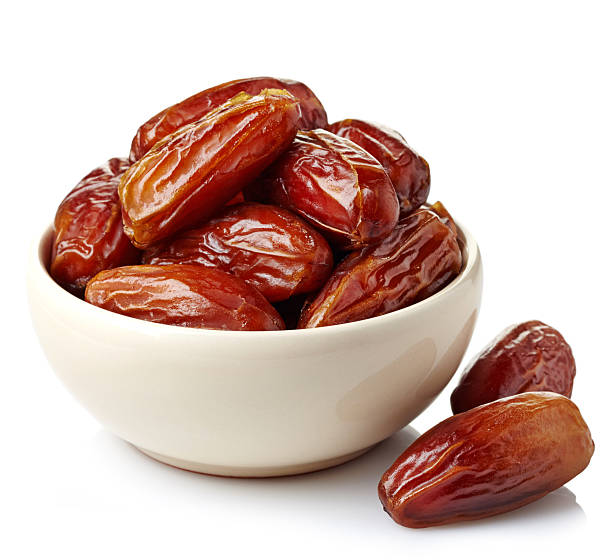